# Part 0: Introduction

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

● Cement : measured in kg in a m3 mixture

● Blast : measured in kg in a m3 mixture

● Fly ash : measured in kg in a m3 mixture

● Water : measured in kg in a m3 mixture

● Superplasticizer : measured in kg in a m3 mixture

● Coarse Aggregate : measured in kg in a m3 mixture

● Fine Aggregate : measured in kg in a m3 mixture

● Age : day (1~365)

● Concrete compressive strength measured in MPa

# Part 1: Exploratory Data Analytics

## Data Import and Checking

**Importing required libraries for the project**

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import AdaBoostRegressor

warnings.filterwarnings('ignore')

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Importing the Dataset

In [2]:
data = pd.read_csv("concrete.csv")

Checking the various basic info about the data in next few steps:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
data.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [5]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

**It is time to begin the Univariate Data Analysis**

## Univariate Analysis 

Defining function for finding outliers

In [6]:
out=[]

def outliers(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            out.append(y)
    print(out)

### Cement

In [7]:
print("Min Value = ", data.cement.quantile(0))
print("Q1 or 25% = ", data.cement.quantile(0.25))
print("Q2/Median = ", data.cement.quantile(0.5))
print("Q3 or 75% = ", data.cement.quantile(0.75))
print("Max value = ", data.cement.quantile(1))
print("Interquartile Range = ", stats.iqr(data.cement))
print("Mean value = %.3f" % np.mean(data.cement))

Min Value =  102.0
Q1 or 25% =  192.375
Q2/Median =  272.9
Q3 or 75% =  350.0
Max value =  540.0
Interquartile Range =  157.625
Mean value = 281.168


In [8]:
print("The list of outliers is: ")
outliers(data.cement)

The list of outliers is: 
[]


In [9]:
out = []

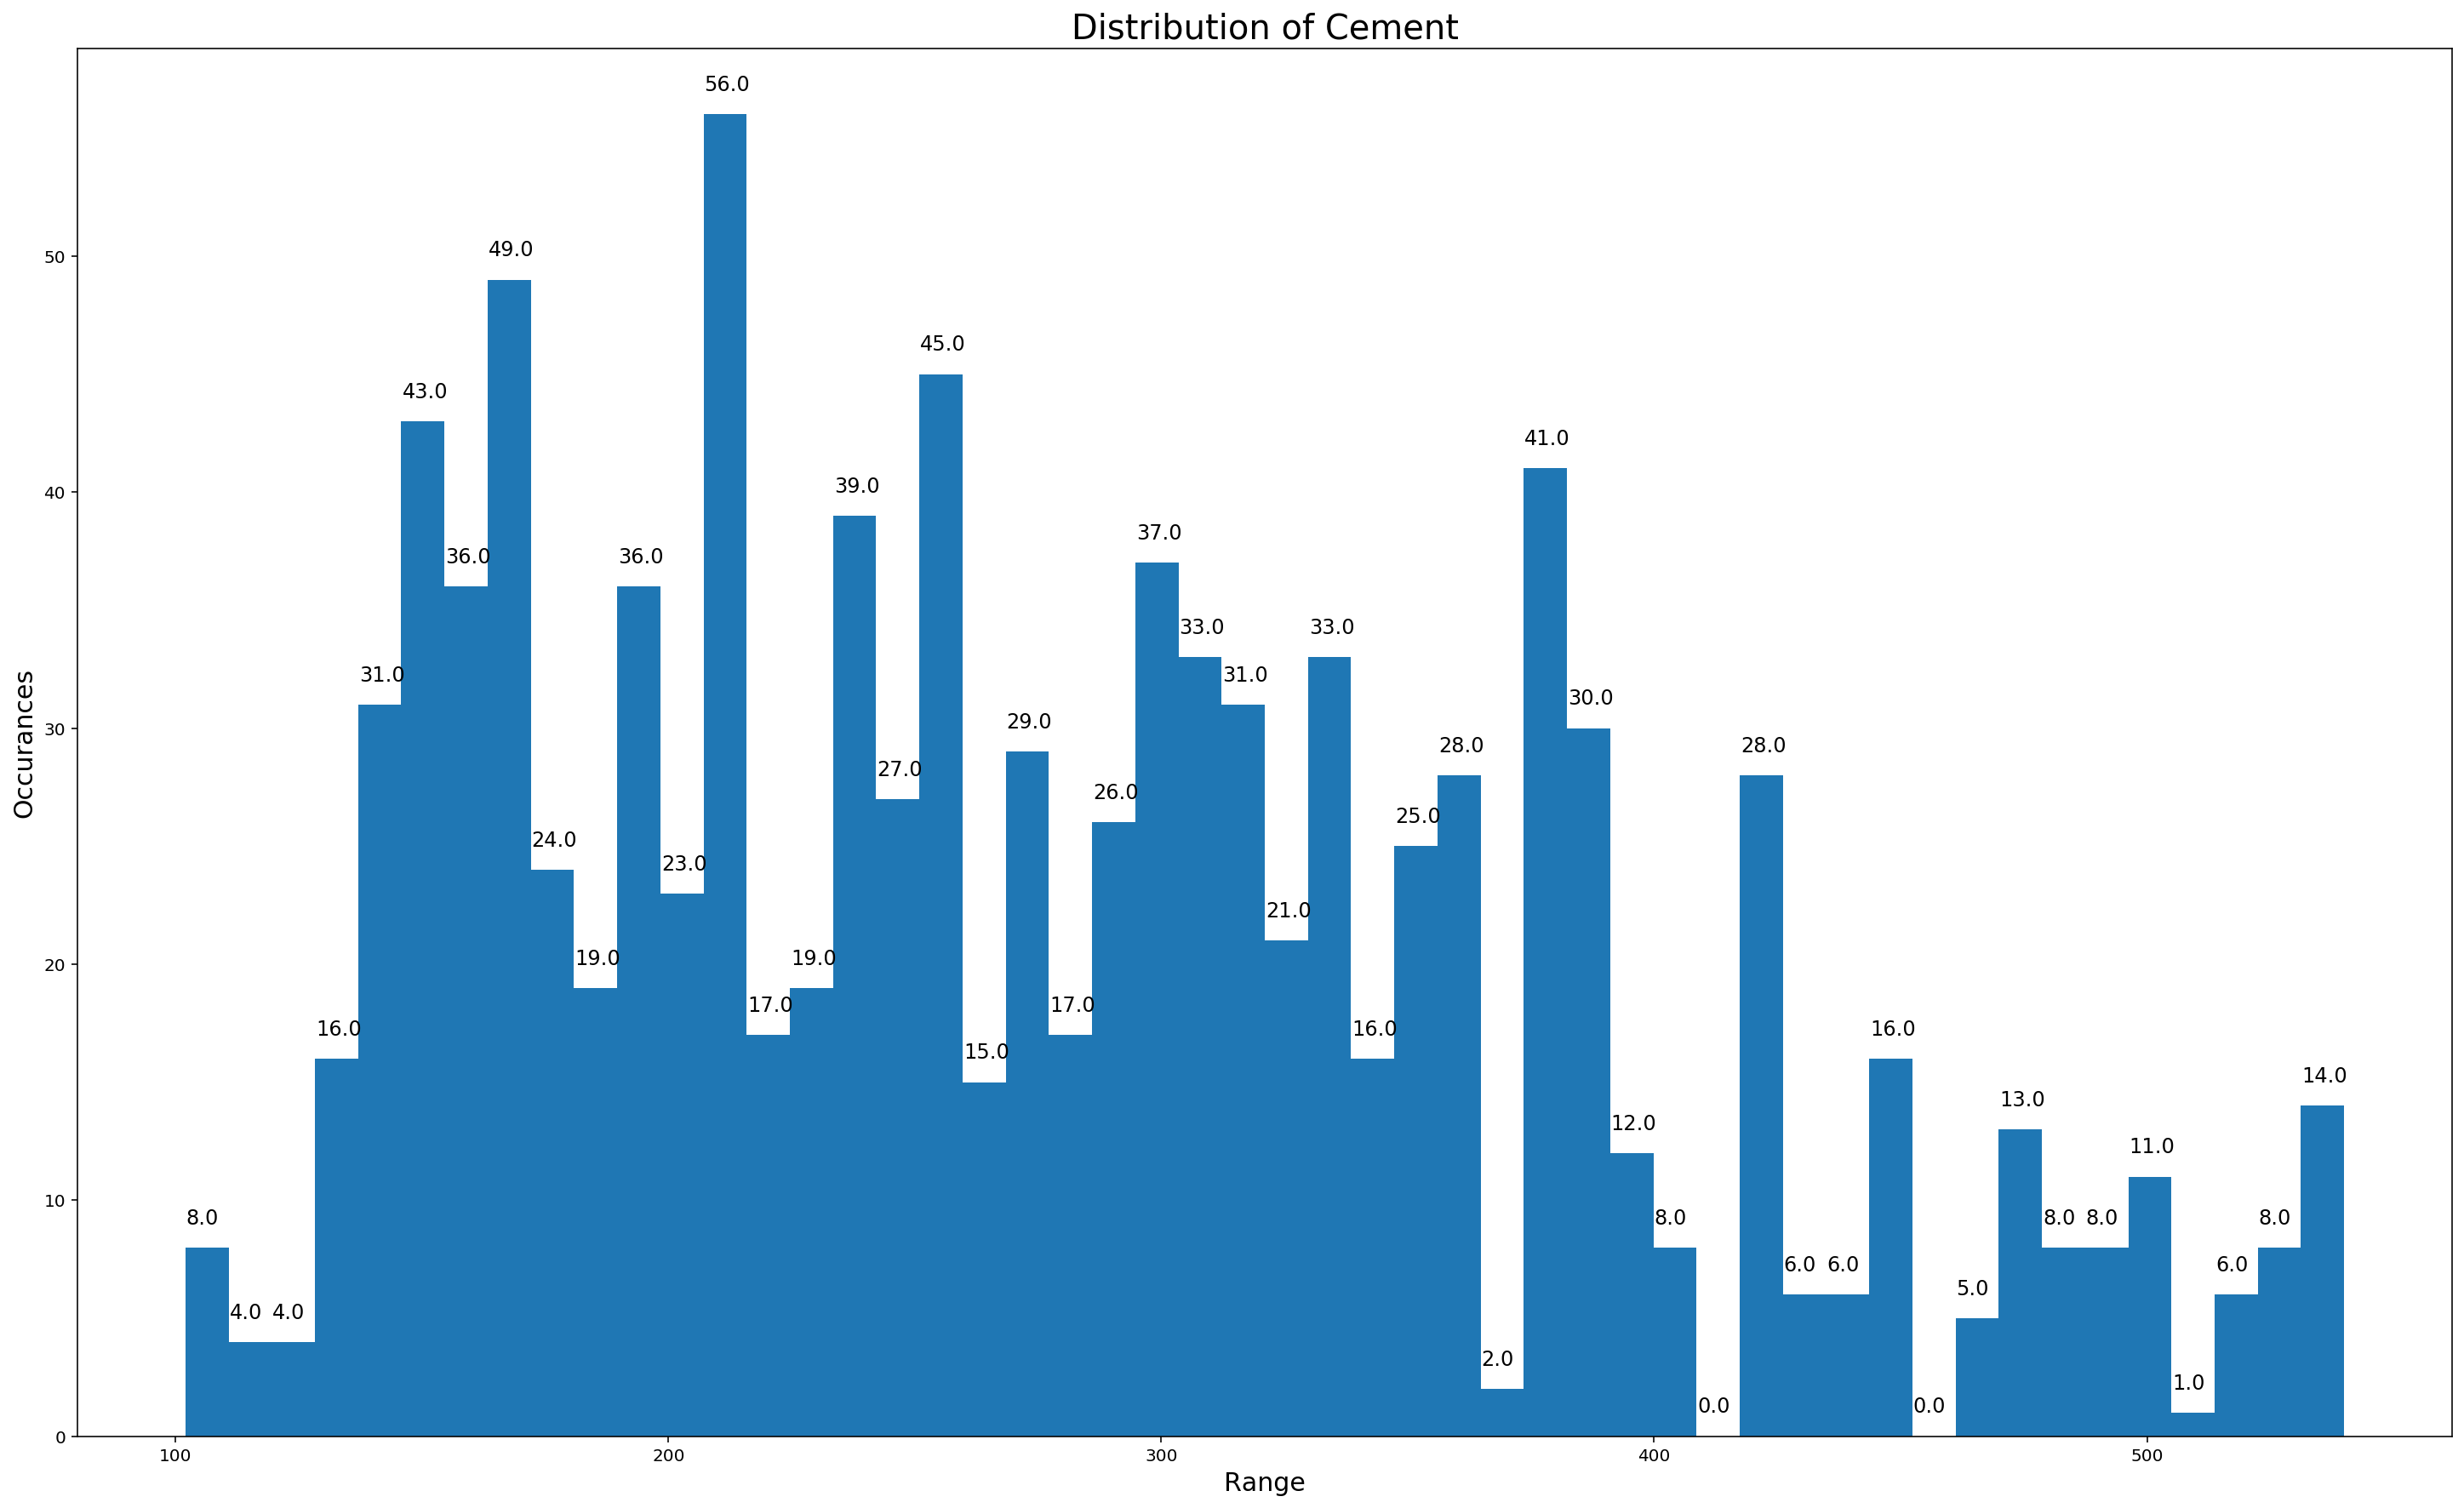

In [10]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Cement", fontsize = 20)

plt.hist(data.cement,bins = 50, histtype = 'bar', range = (data.cement.min(),data.cement.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

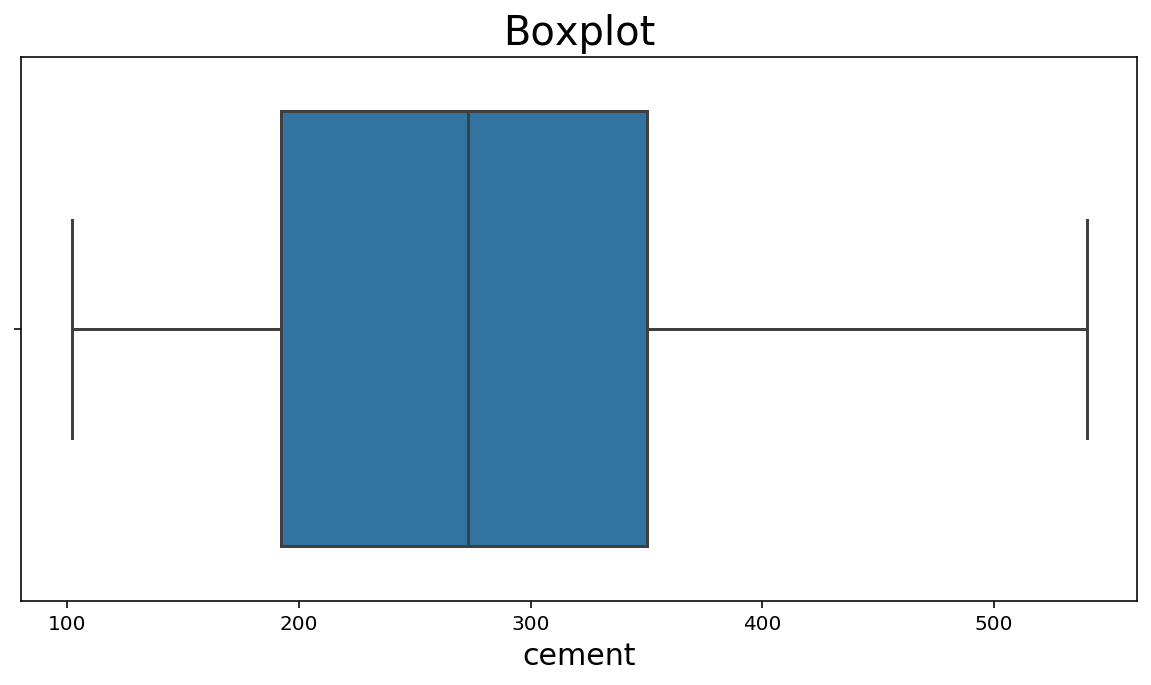

In [11]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['cement'], data=data, ax = ax)

**The data seems to be skewed right and there is no presence of outliers**

### Slag 

In [12]:
print("Min Value = ", data.slag.quantile(0))
print("Q1 or 25% = ", data.slag.quantile(0.25))
print("Q2/Median = ", data.slag.quantile(0.5))
print("Q3 or 75% = ", data.slag.quantile(0.75))
print("Max value = ", data.slag.quantile(1))
print("Interquartile Range = ", stats.iqr(data.slag))
print("Mean value = %.3f" % np.mean(data.slag))

Min Value =  0.0
Q1 or 25% =  0.0
Q2/Median =  22.0
Q3 or 75% =  142.95
Max value =  359.4
Interquartile Range =  142.95
Mean value = 73.896


In [13]:
print("The list of outliers is: ")
outliers(data.slag)

The list of outliers is: 
[342.1, 342.1, 359.4, 359.4]


In [14]:
out = []

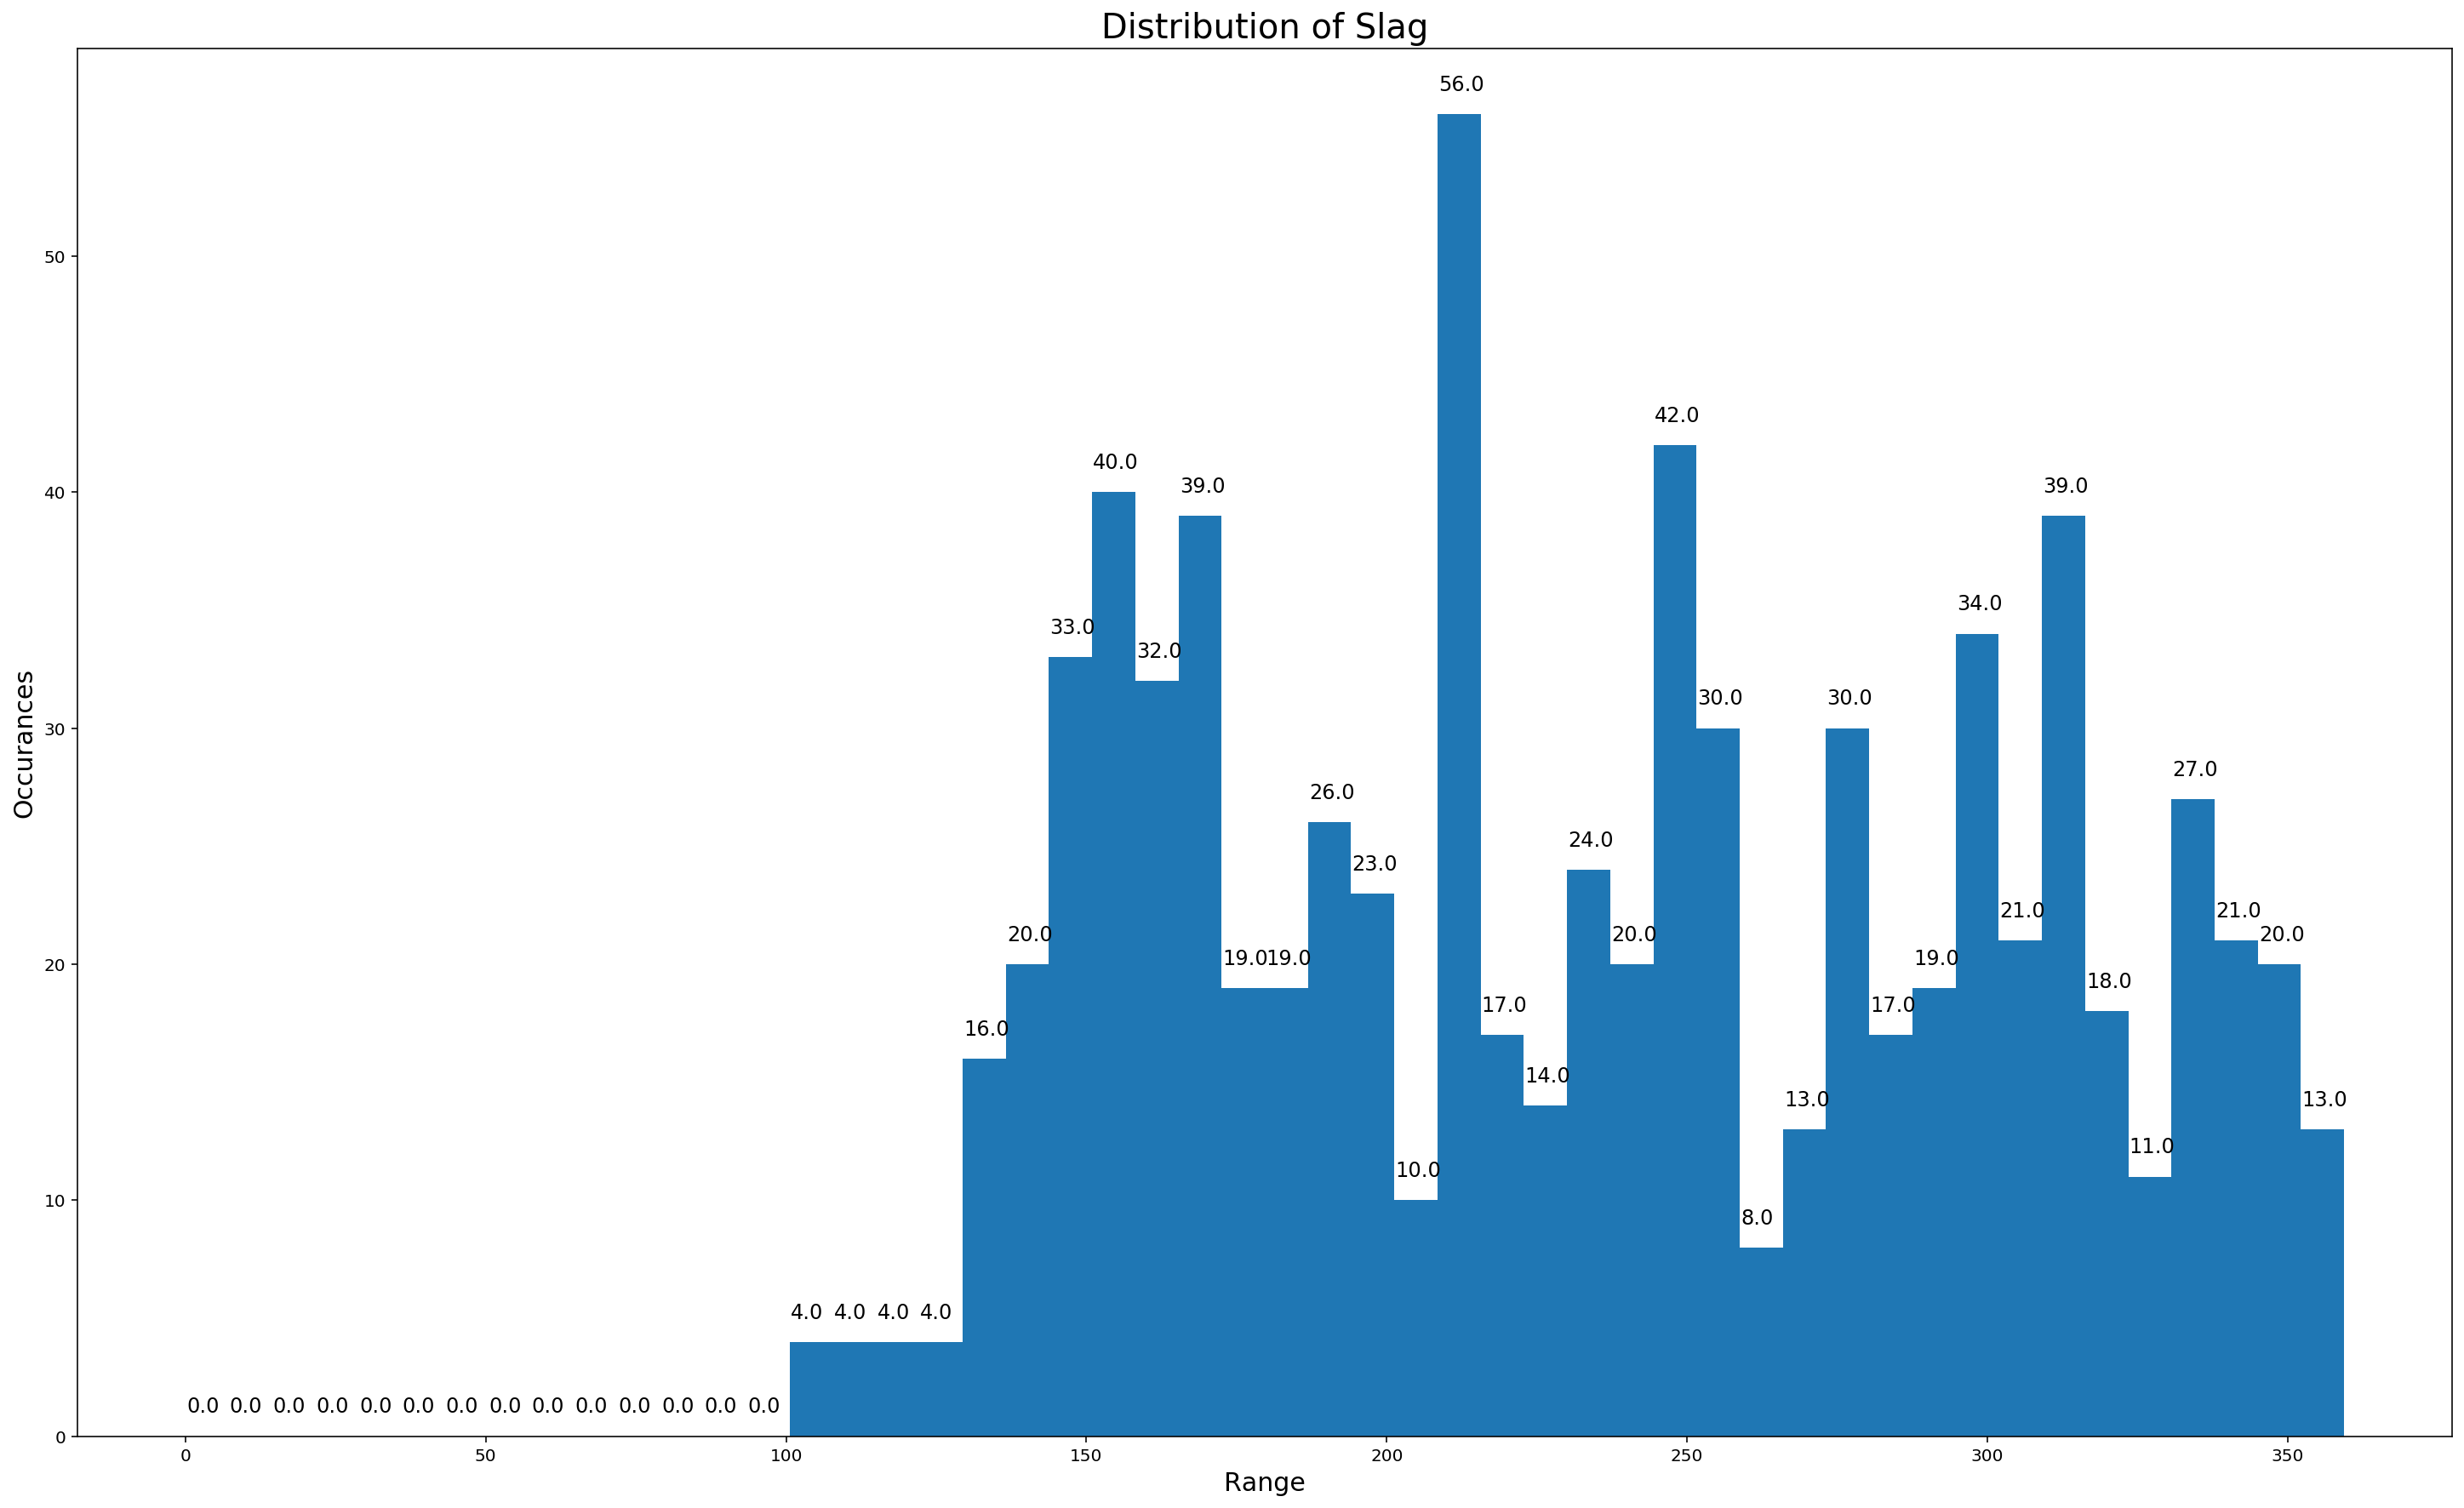

In [15]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Slag", fontsize = 20)

plt.hist(data.cement,bins = 50, histtype = 'bar', range = (data.slag.min(),data.slag.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

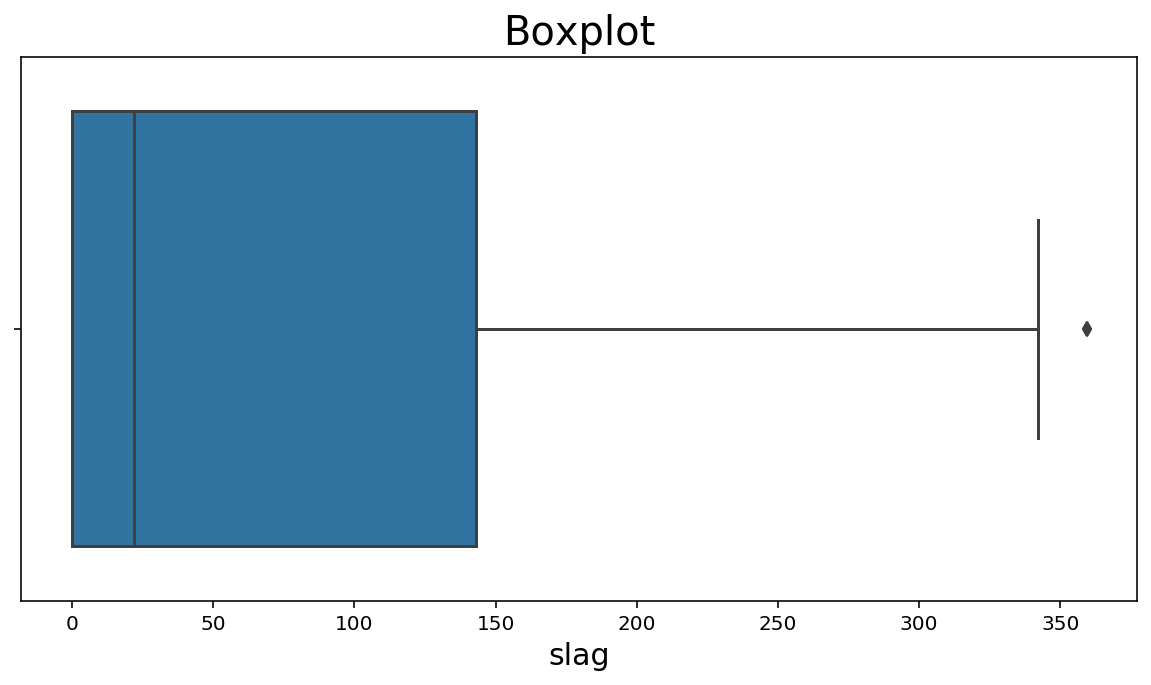

In [16]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['slag'], data=data, ax = ax)

**The slag data seems to be skewed to the left highly, and also there are some outliers in the data. Majority of the data seems to be concentrated between the 0-150 range.**

### Ash 

In [17]:
print("Min Value = ", data.ash.quantile(0))
print("Q1 or 25% = ", data.ash.quantile(0.25))
print("Q2/Median = ", data.ash.quantile(0.5))
print("Q3 or 75% = ", data.ash.quantile(0.75))
print("Max value = ", data.ash.quantile(1))
print("Interquartile Range = ", stats.iqr(data.ash))
print("Mean value = %.3f" % np.mean(data.ash))

Min Value =  0.0
Q1 or 25% =  0.0
Q2/Median =  0.0
Q3 or 75% =  118.3
Max value =  200.1
Interquartile Range =  118.3
Mean value = 54.188


In [18]:
print("The list of outliers is: ")
outliers(data.ash)

The list of outliers is: 
[]


In [19]:
out = []

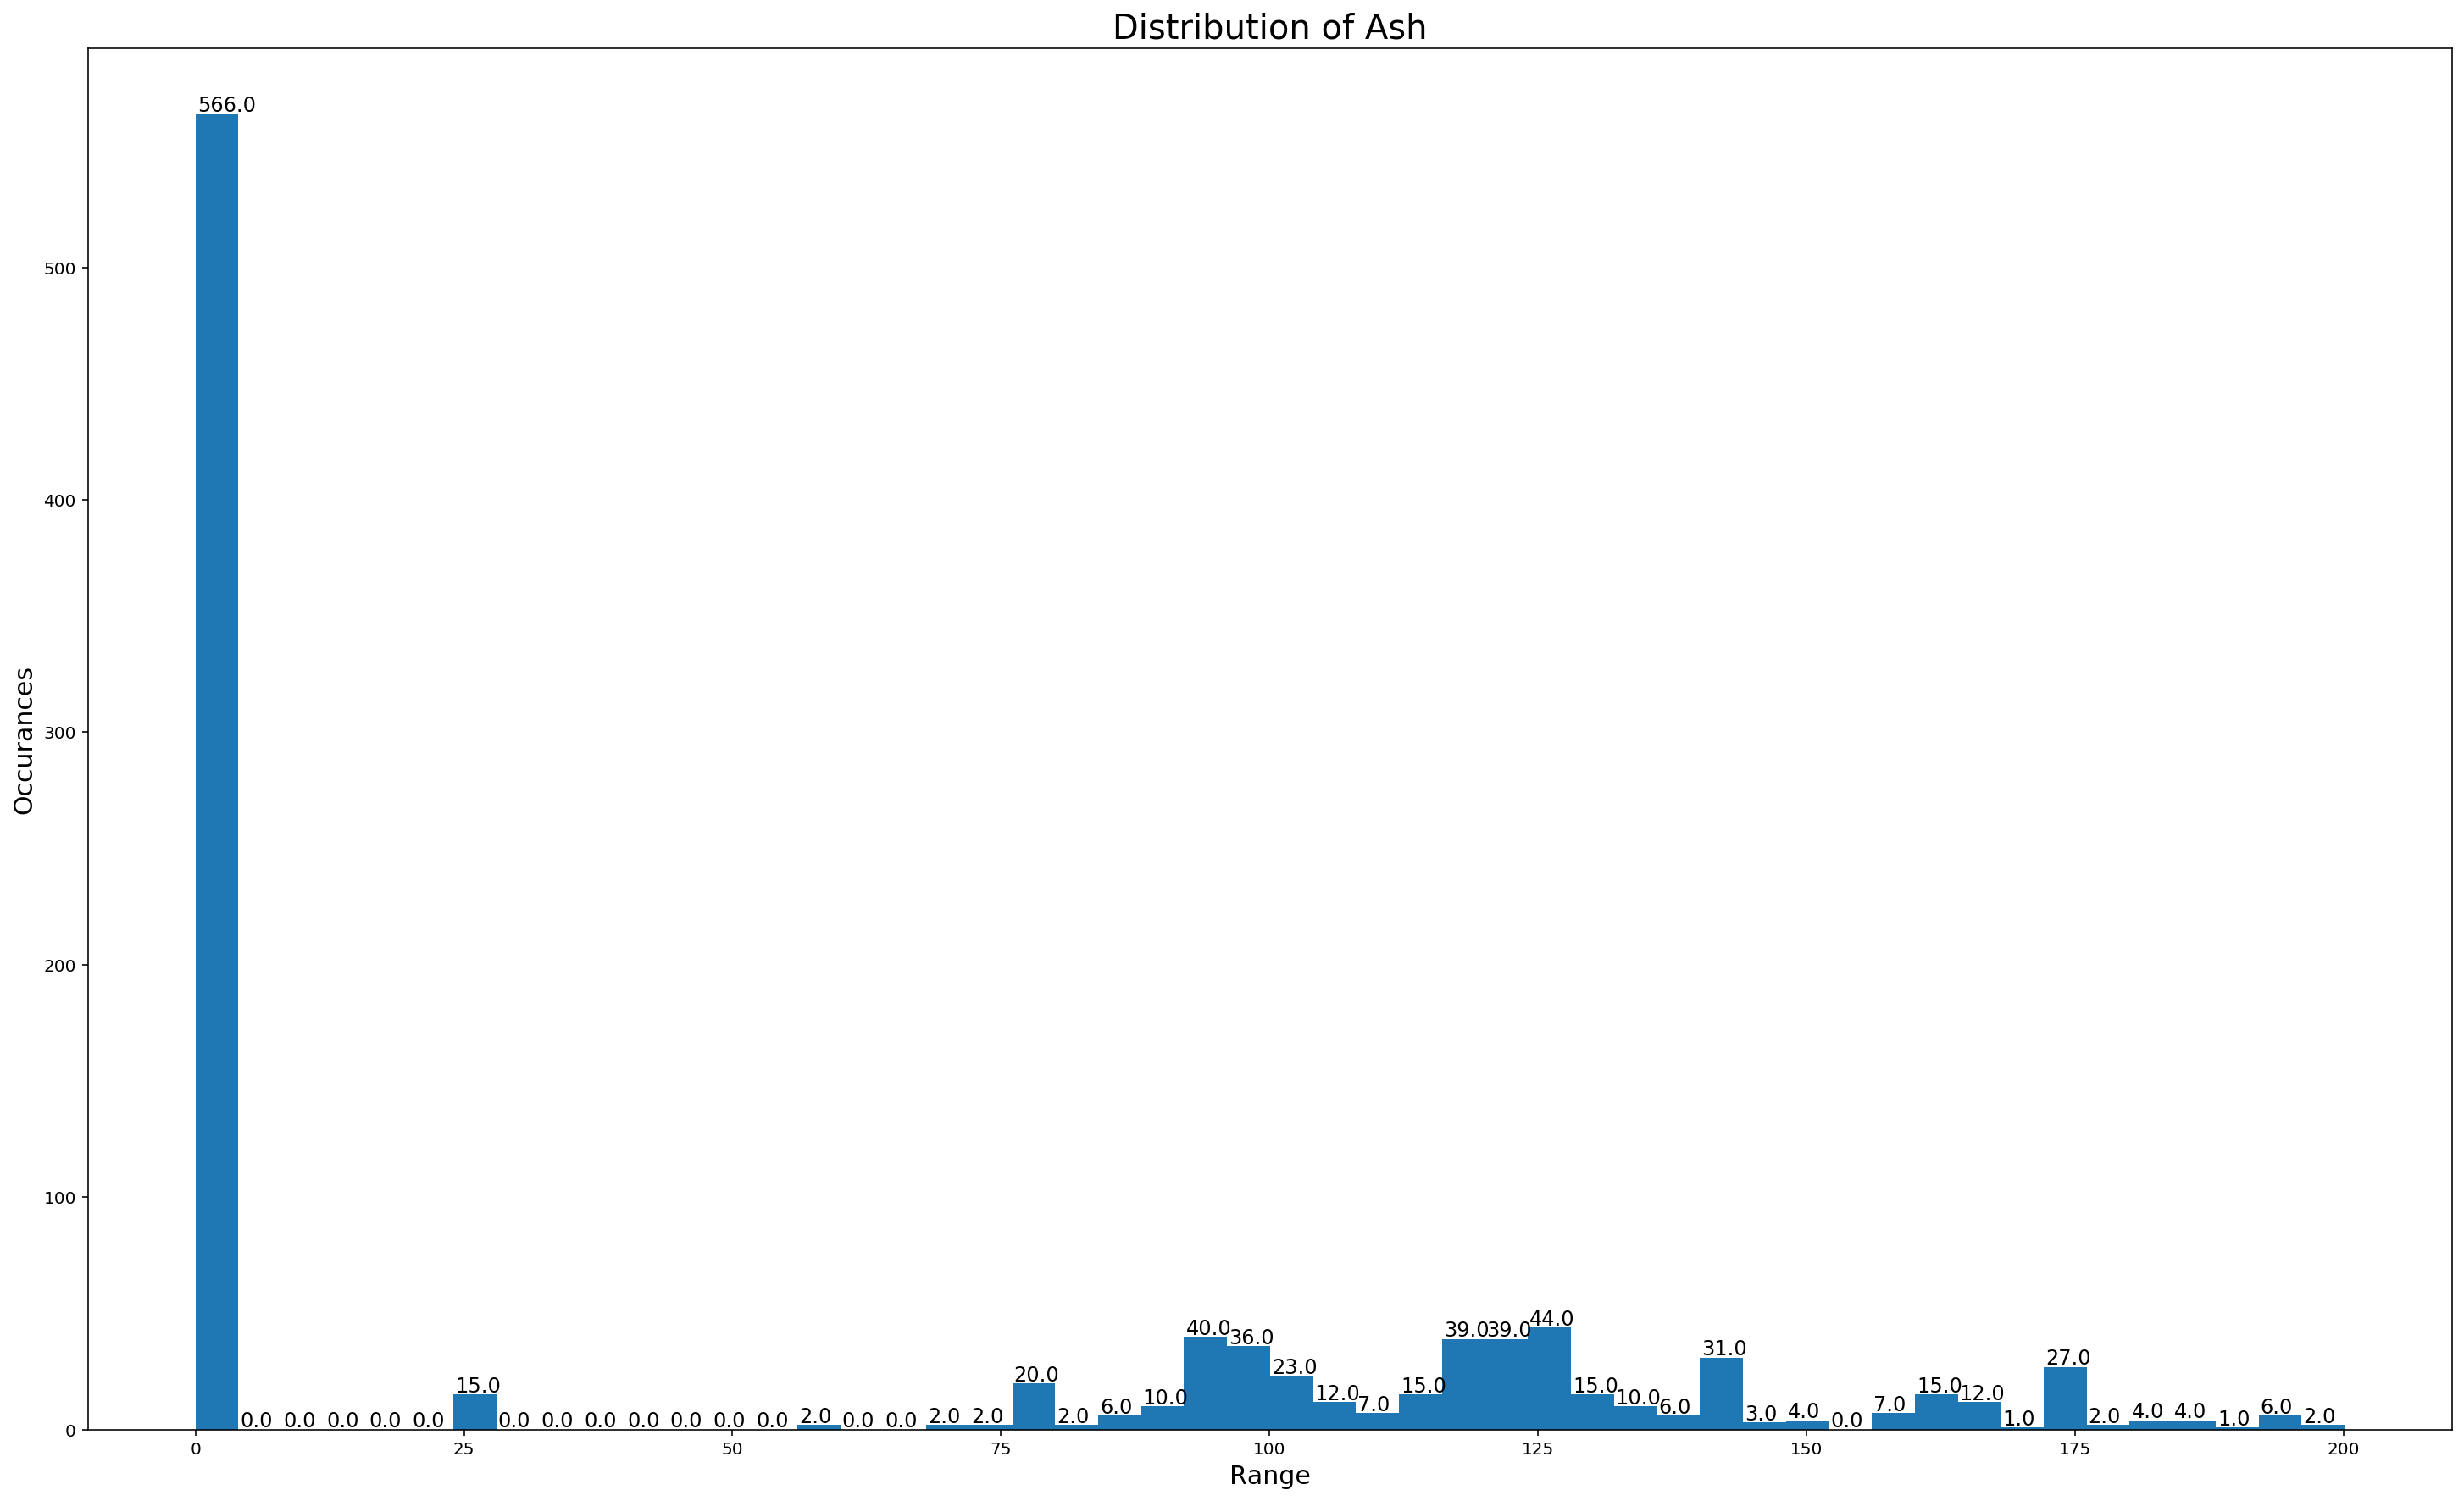

In [20]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Ash", fontsize = 20)

plt.hist(data.ash,bins = 50, histtype = 'bar', range = (data.ash.min(),data.ash.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

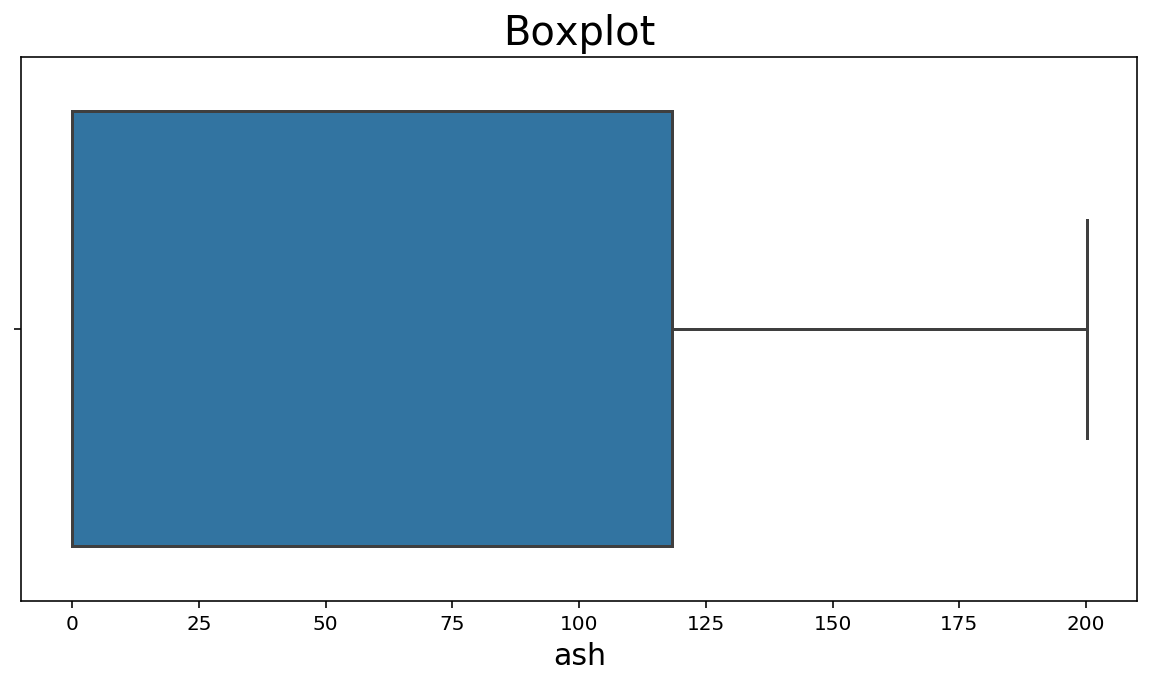

In [21]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['ash'], data=data, ax = ax)

**The data seems to have no outliers, but the distribution is very weird. The mean and the 25% seem to be the same value, and the data seems to be not skewed, but rather distributed in a very haphazard way. Perhaps, later on, during feature engineering, this feature might be dropped.**

### Water 

In [22]:
print("Min Value = ", data.water.quantile(0))
print("Q1 or 25% = ", data.water.quantile(0.25))
print("Q2/Median = ", data.water.quantile(0.5))
print("Q3 or 75% = ", data.water.quantile(0.75))
print("Max value = ", data.water.quantile(1))
print("Interquartile Range = ", stats.iqr(data.water))
print("Mean value = %.3f" % np.mean(data.water))

Min Value =  121.8
Q1 or 25% =  164.9
Q2/Median =  185.0
Q3 or 75% =  192.0
Max value =  247.0
Interquartile Range =  27.099999999999994
Mean value = 181.567


In [23]:
print("The list of outliers is: ")
outliers(data.water)

The list of outliers is: 
[247.0, 246.9]


In [24]:
out = []

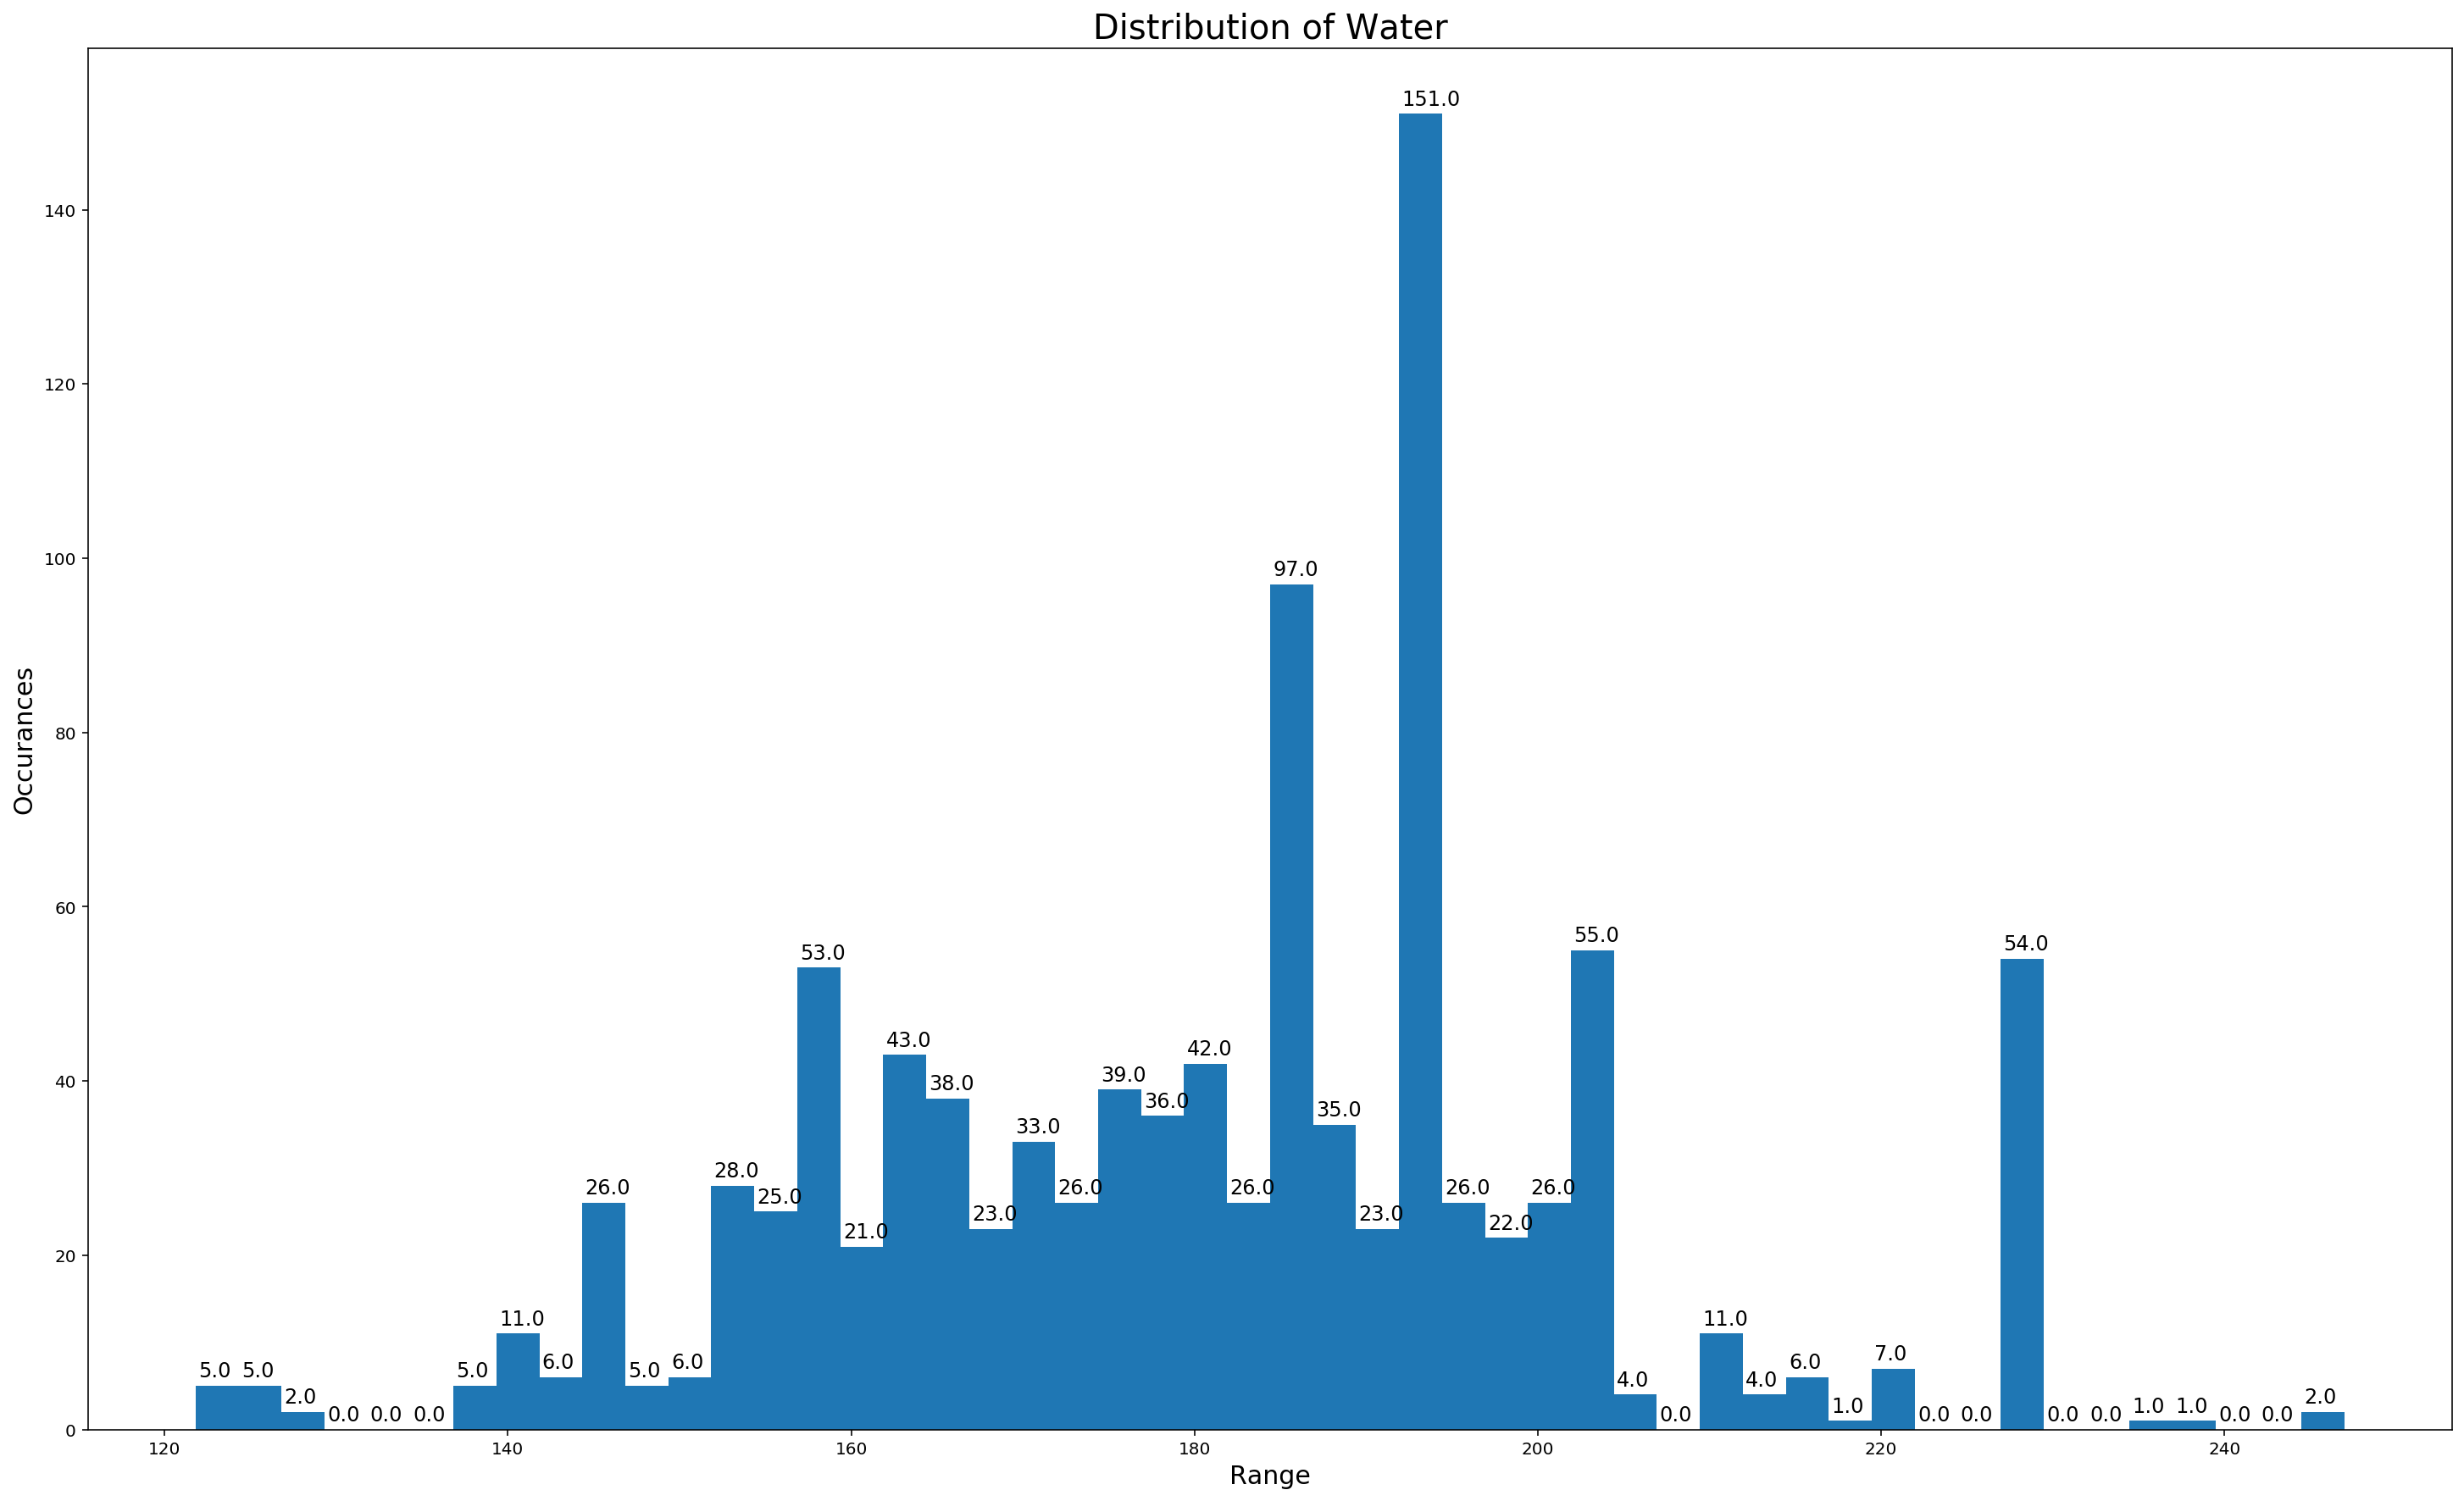

In [25]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Water", fontsize = 20)

plt.hist(data.water,bins = 50, histtype = 'bar', range = (data.water.min(),data.water.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

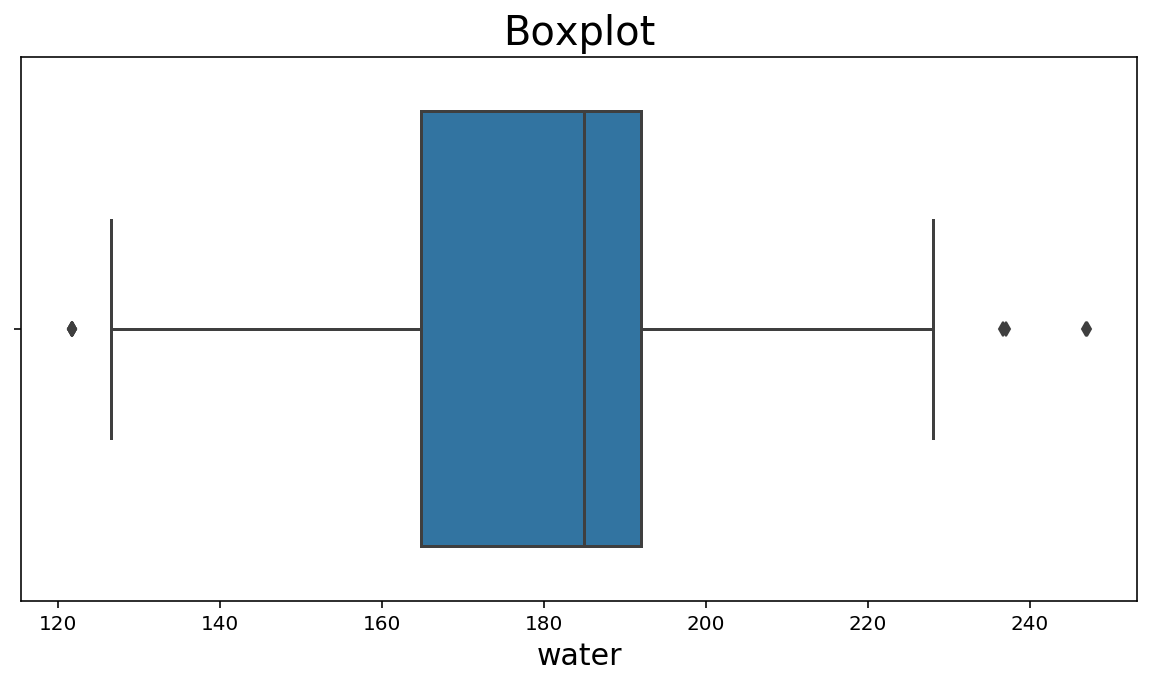

In [26]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['water'], data=data, ax = ax)

**We see that there are 3 outliers in the dataset, but the distribution doesn't seem to be skewed too much. Perhaps this feature might be of some importance later on, based on the data's visualization**

### Superplastic 

In [27]:
print("Min Value = ", data.superplastic.quantile(0))
print("Q1 or 25% = ", data.superplastic.quantile(0.25))
print("Q2/Median = ", data.superplastic.quantile(0.5))
print("Q3 or 75% = ", data.superplastic.quantile(0.75))
print("Max value = ", data.superplastic.quantile(1))
print("Interquartile Range = ", stats.iqr(data.superplastic))
print("Mean value = %.3f" % np.mean(data.superplastic))

Min Value =  0.0
Q1 or 25% =  0.0
Q2/Median =  6.4
Q3 or 75% =  10.2
Max value =  32.2
Interquartile Range =  10.2
Mean value = 6.205


In [28]:
print("The list of outliers is: ")
outliers(data.superplastic)

The list of outliers is: 
[28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2]


In [29]:
out = []

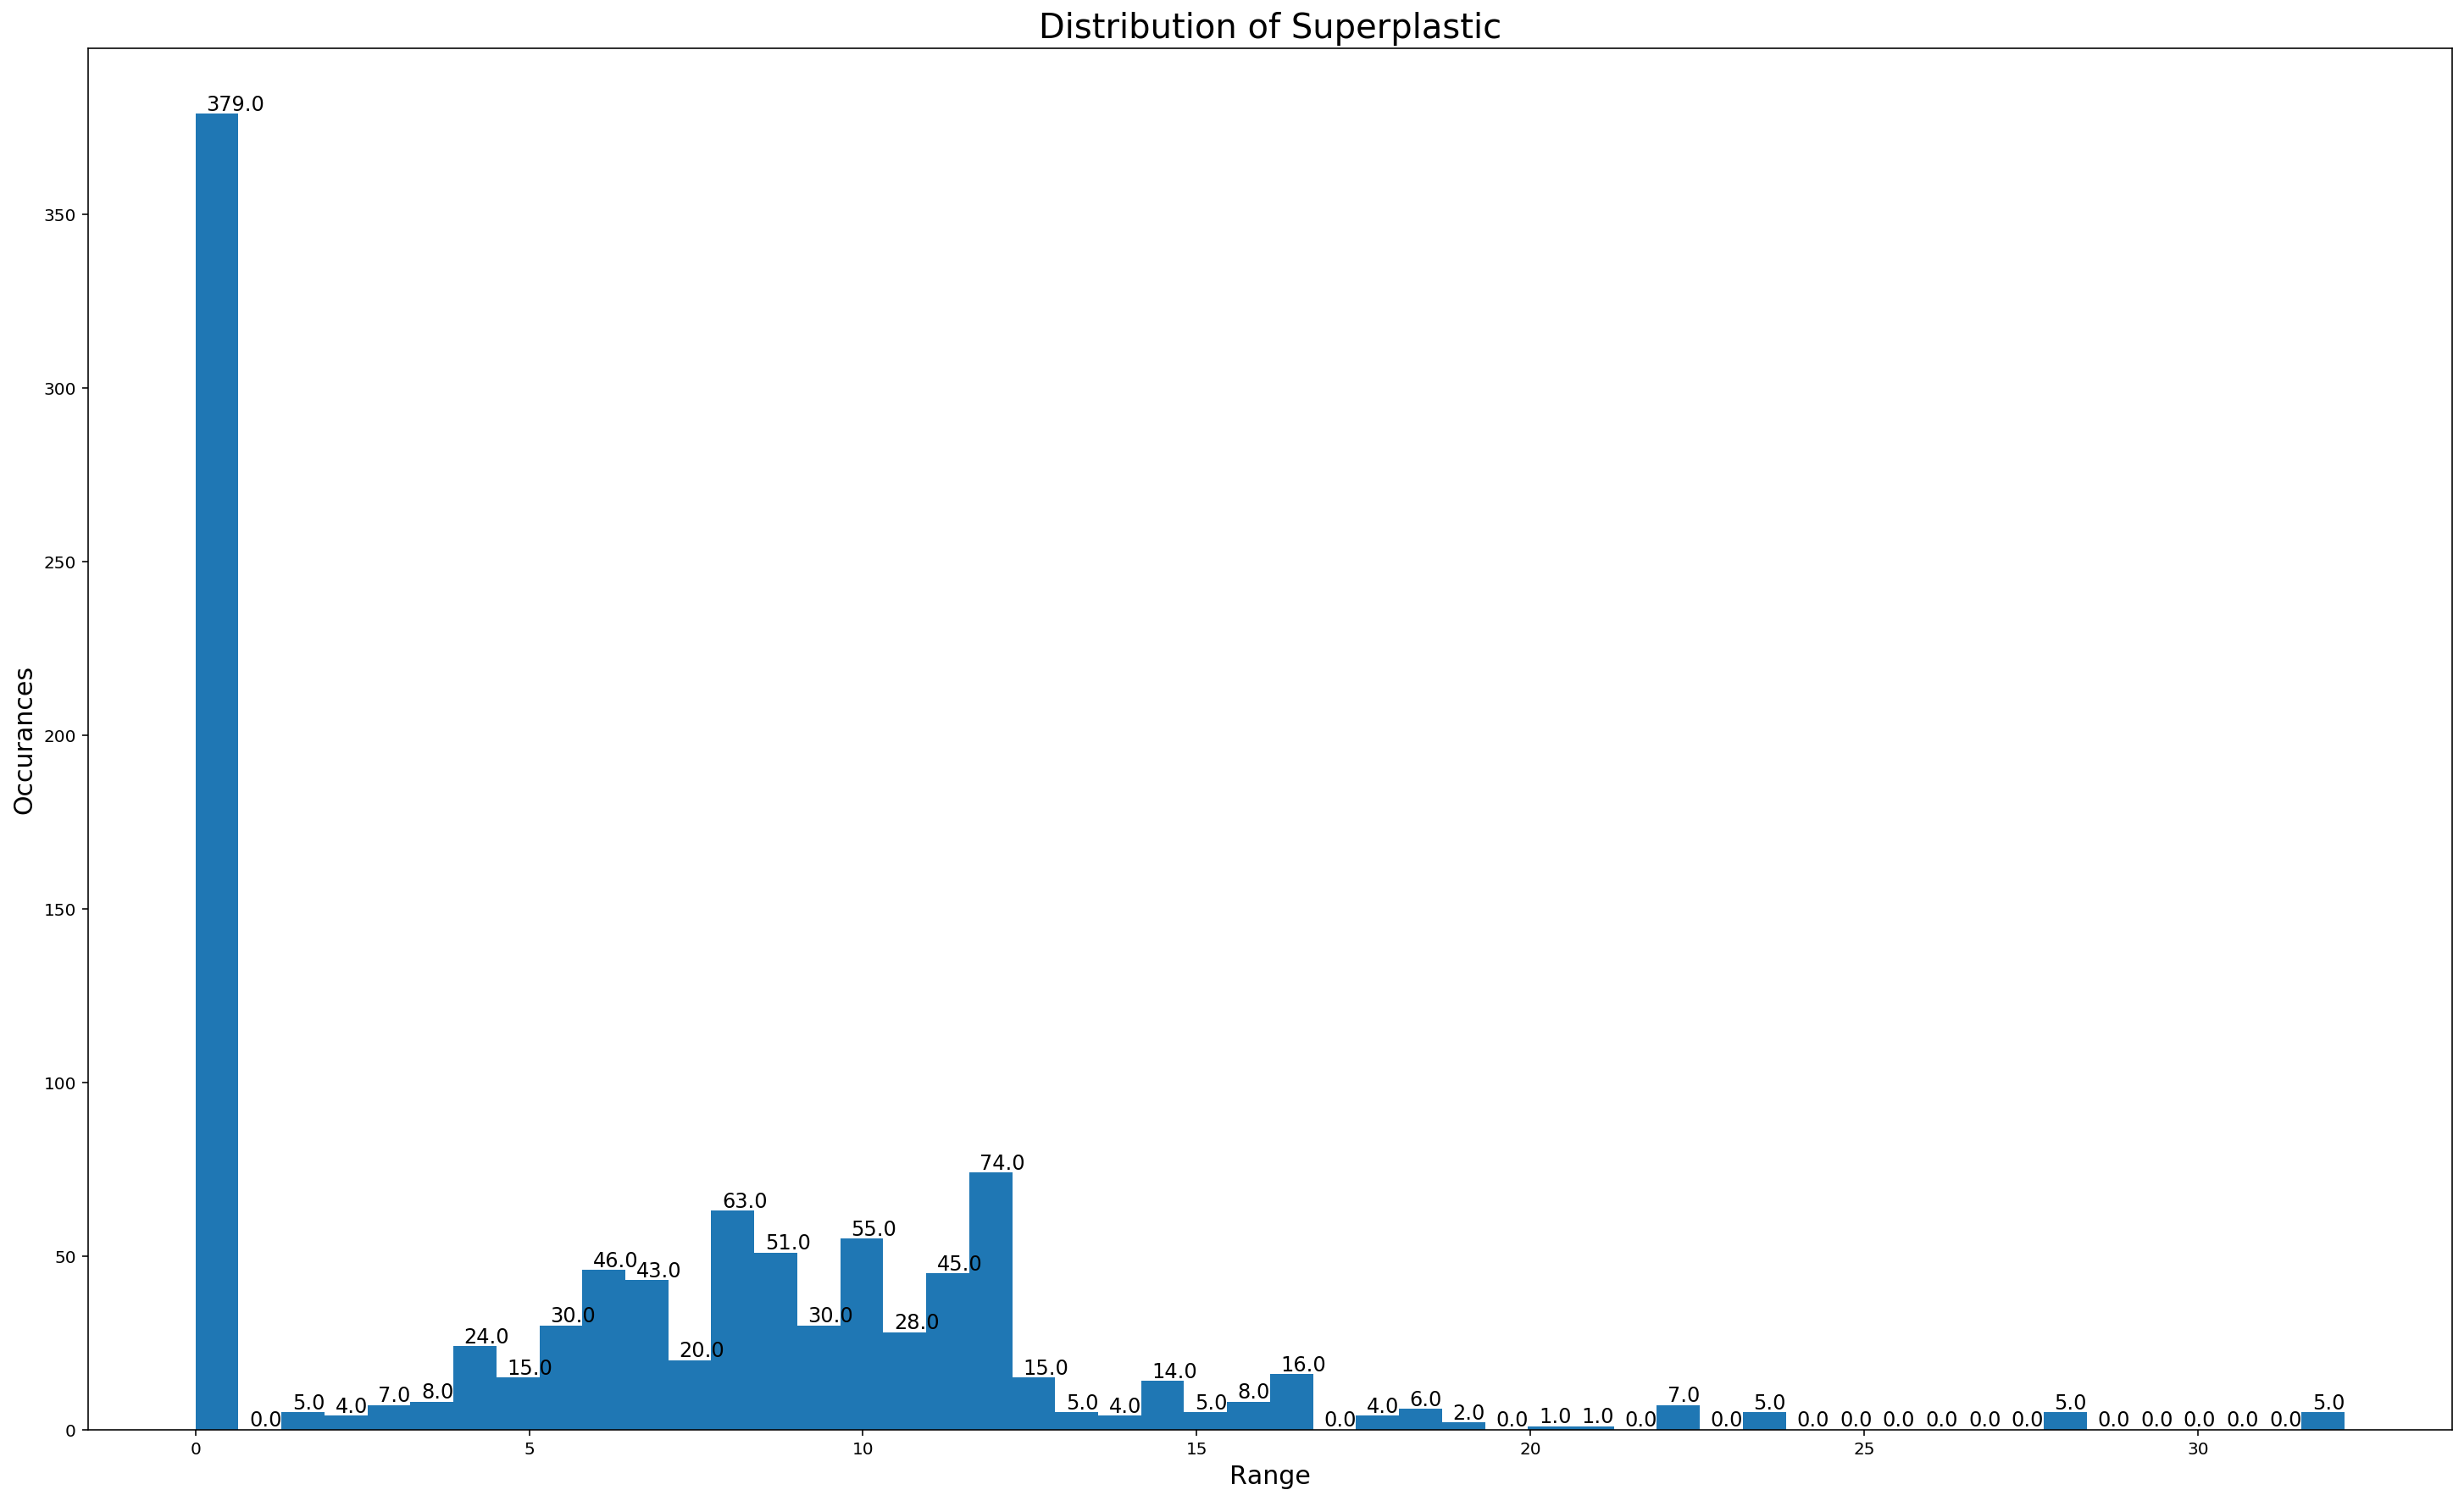

In [30]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Superplastic", fontsize = 20)

plt.hist(data.superplastic,bins = 50, histtype = 'bar', range = (data.superplastic.min(),data.superplastic.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

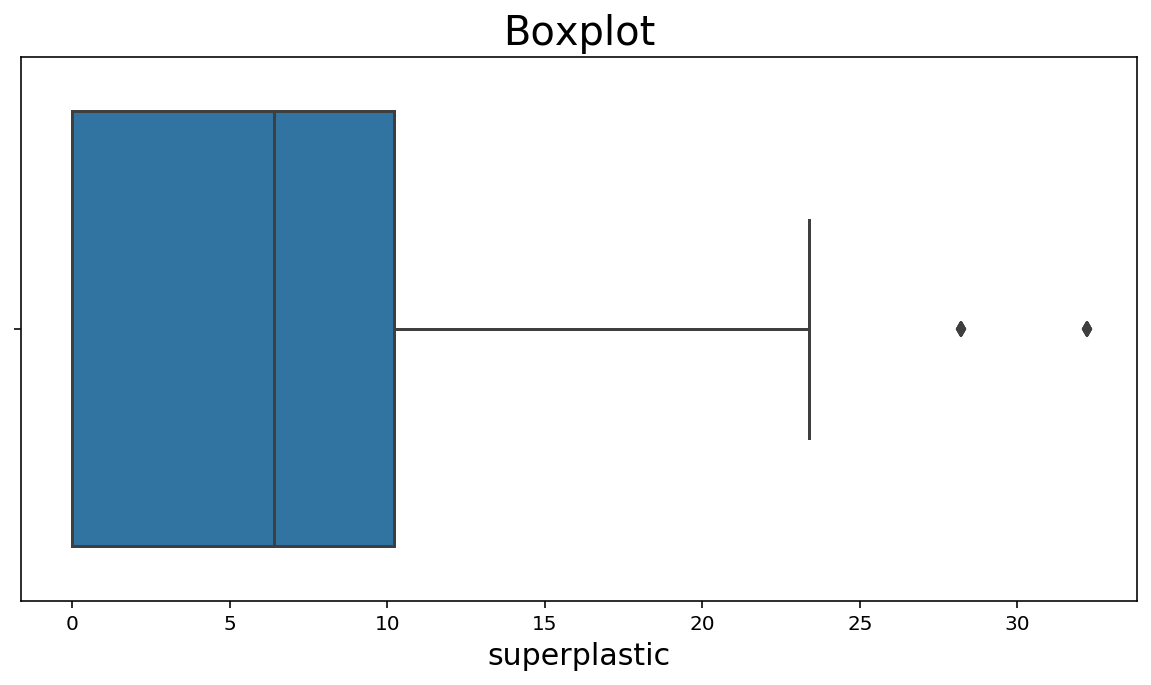

In [31]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['superplastic'], data=data, ax = ax)

**The data seems to be skewed right, and half of the data seems to be concentrated around 0-15 range. There are also quite some outliers in this data**

### Coarseagg 

In [32]:
print("Min Value = ", data.coarseagg.quantile(0))
print("Q1 or 25% = ", data.coarseagg.quantile(0.25))
print("Q2/Median = ", data.coarseagg.quantile(0.5))
print("Q3 or 75% = ", data.coarseagg.quantile(0.75))
print("Max value = ", data.coarseagg.quantile(1))
print("Interquartile Range = ", stats.iqr(data.coarseagg))
print("Mean value = %.3f" % np.mean(data.coarseagg))

Min Value =  801.0
Q1 or 25% =  932.0
Q2/Median =  968.0
Q3 or 75% =  1029.4
Max value =  1145.0
Interquartile Range =  97.40000000000009
Mean value = 972.919


In [33]:
print("The list of outliers is: ")
outliers(data.coarseagg)

The list of outliers is: 
[]


In [34]:
out = []

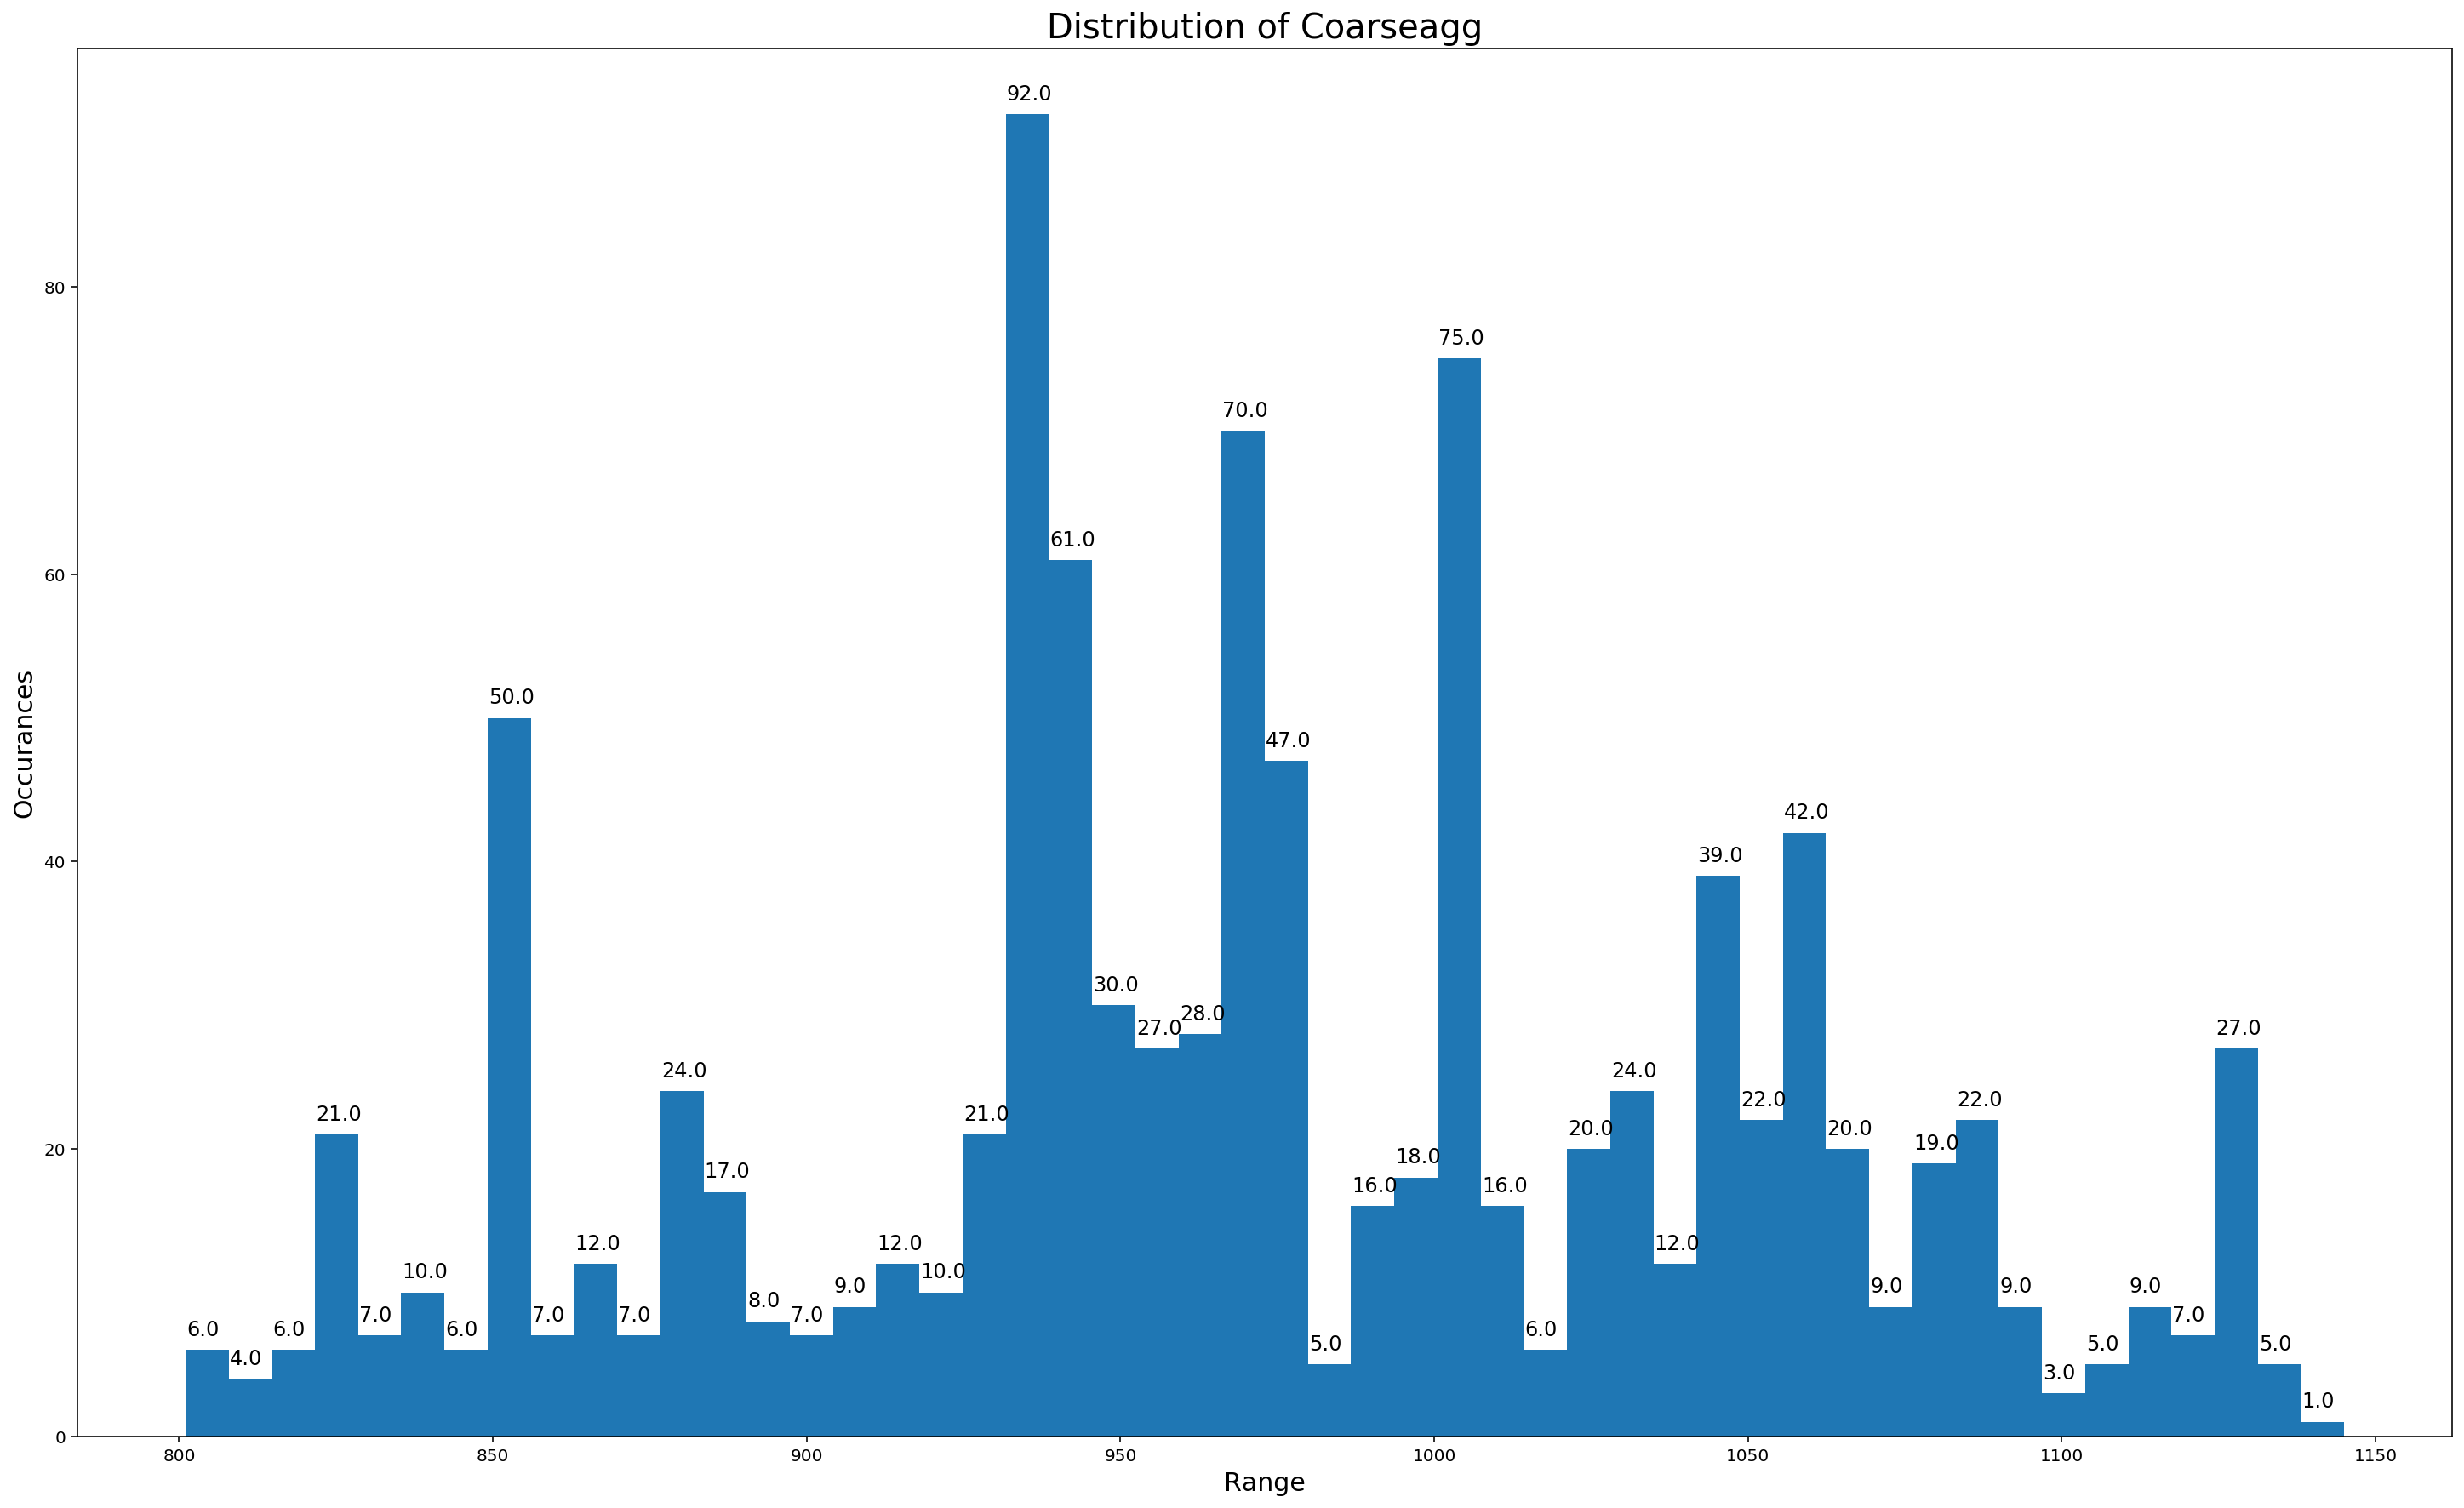

In [35]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Coarseagg", fontsize = 20)

plt.hist(data.coarseagg,bins = 50, histtype = 'bar', range = (data.coarseagg.min(),data.coarseagg.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

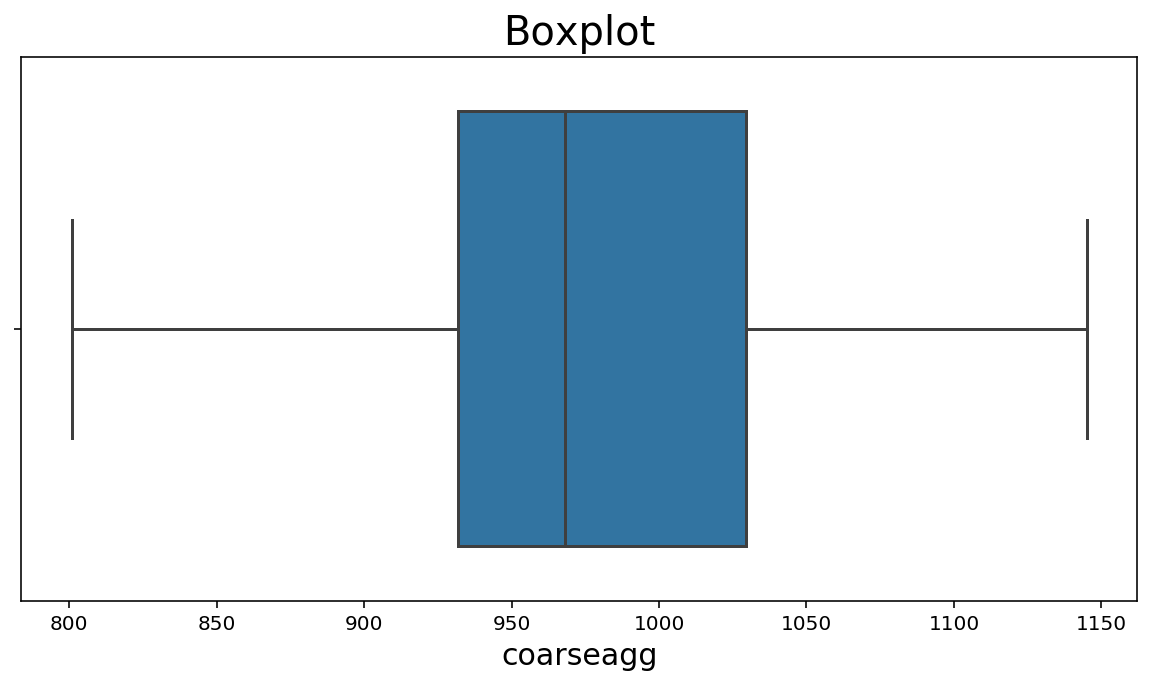

In [36]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['coarseagg'], data=data, ax = ax)

**This feature seems to be evenly distributed, from the visulization and there is also no presence of outliers**

### Fineagg

In [37]:
print("Min Value = ", data.fineagg.quantile(0))
print("Q1 or 25% = ", data.fineagg.quantile(0.25))
print("Q2/Median = ", data.fineagg.quantile(0.5))
print("Q3 or 75% = ", data.fineagg.quantile(0.75))
print("Max value = ", data.fineagg.quantile(1))
print("Interquartile Range = ", stats.iqr(data.fineagg))
print("Mean value = %.3f" % np.mean(data.fineagg))

Min Value =  594.0
Q1 or 25% =  730.9499999999999
Q2/Median =  779.5
Q3 or 75% =  824.0
Max value =  992.6
Interquartile Range =  93.05000000000007
Mean value = 773.580


In [38]:
print("The list of outliers is: ")
outliers(data.fineagg)

The list of outliers is: 
[]


In [39]:
out = []

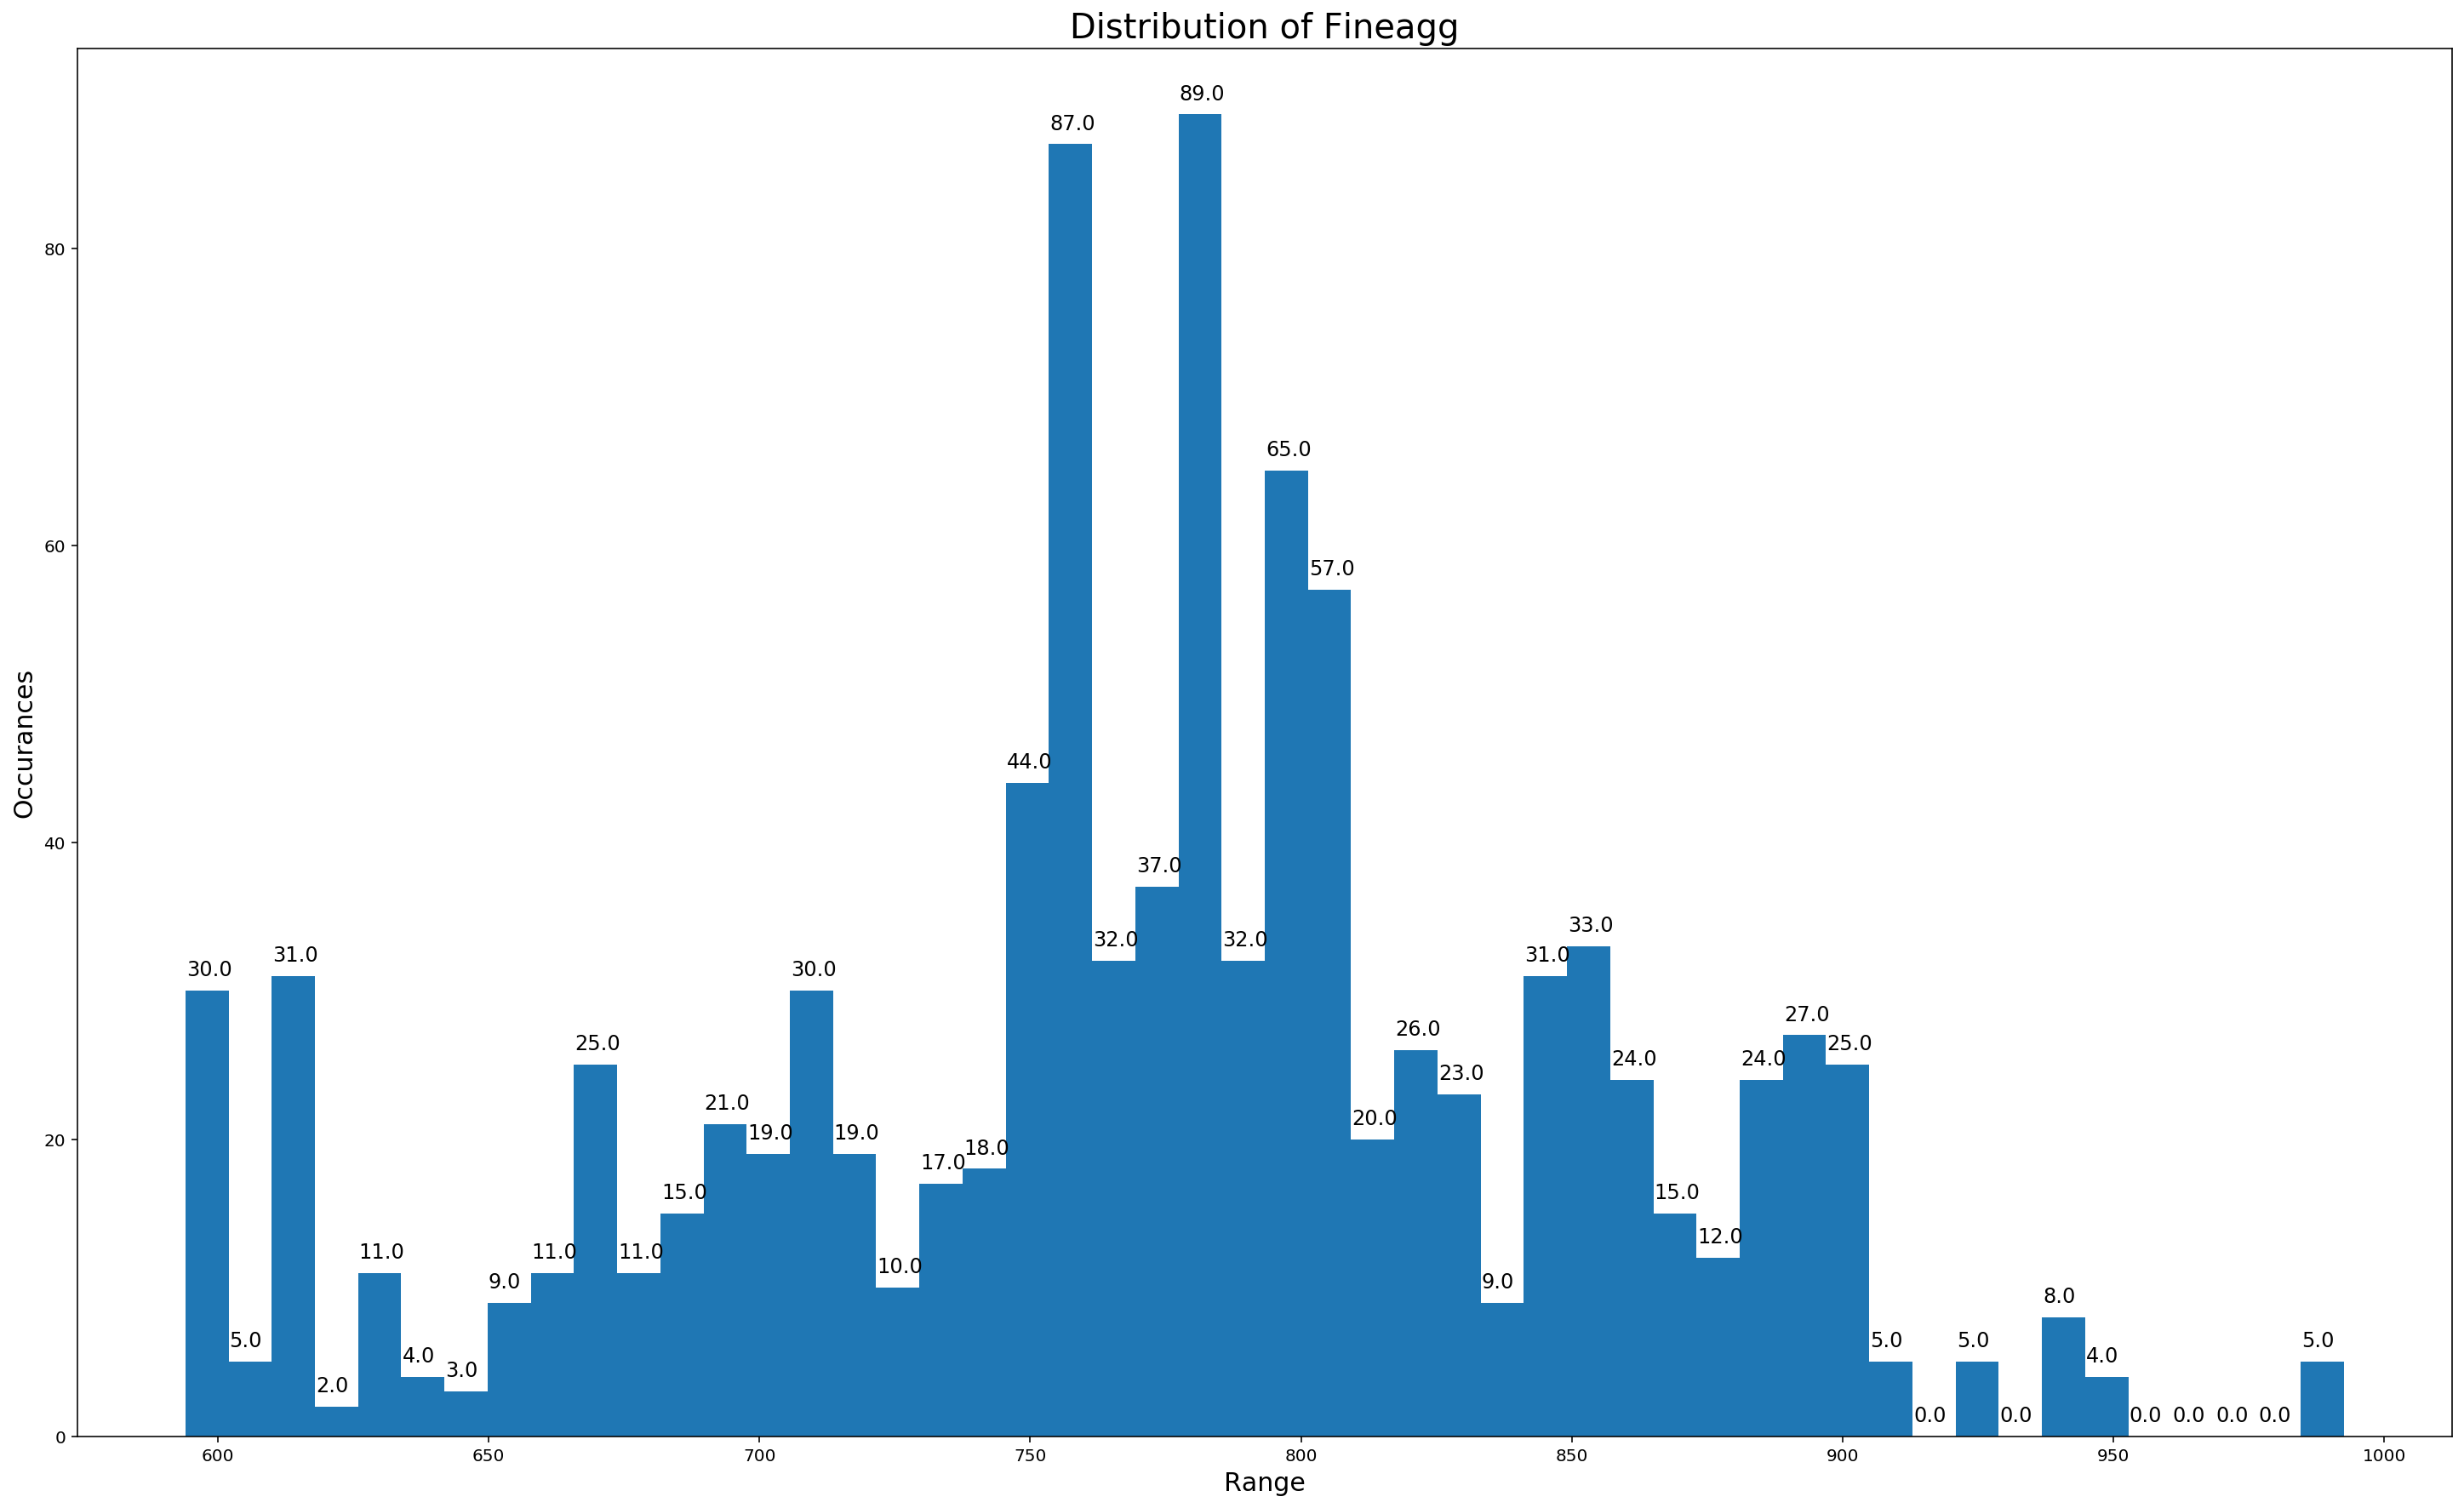

In [40]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of Fineagg", fontsize = 20)

plt.hist(data.fineagg,bins = 50, histtype = 'bar', range = (data.fineagg.min(),data.fineagg.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

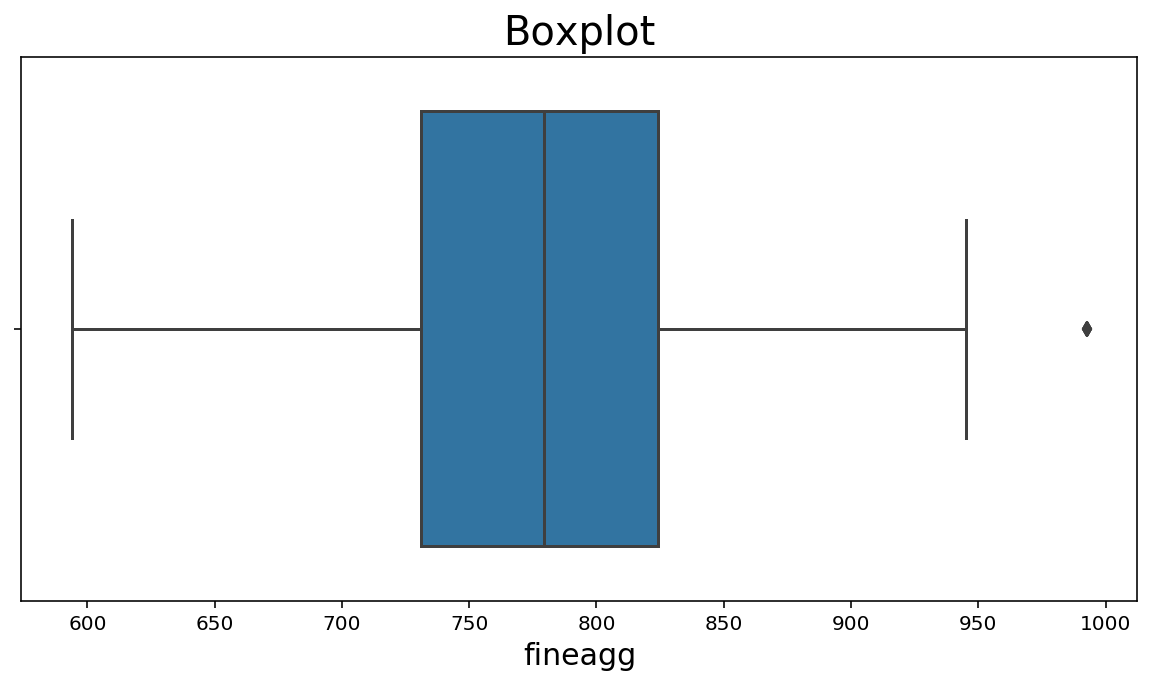

In [41]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['fineagg'], data=data, ax = ax)

**There seems to be no outliers, and the distribution seems only slightly skewed right, but otherwise pretty evenly distributed**

### Age 

In [42]:
print("Min Value = ", data.age.quantile(0))
print("Q1 or 25% = ", data.age.quantile(0.25))
print("Q2/Median = ", data.age.quantile(0.5))
print("Q3 or 75% = ", data.age.quantile(0.75))
print("Max value = ", data.age.quantile(1))
print("Interquartile Range = ", stats.iqr(data.age))
print("Mean value = %.3f" % np.mean(data.age))

Min Value =  1.0
Q1 or 25% =  7.0
Q2/Median =  28.0
Q3 or 75% =  56.0
Max value =  365.0
Interquartile Range =  49.0
Mean value = 45.662


In [43]:
print("The list of outliers is: ")
outliers(data.age)

The list of outliers is: 
[365, 365, 270, 360, 365, 365, 270, 270, 270, 270, 270, 360, 360, 365, 360, 365, 365, 270, 365, 270, 270, 365, 365, 365, 360, 270, 270, 365, 360, 270, 365, 365, 270]


In [44]:
out = []

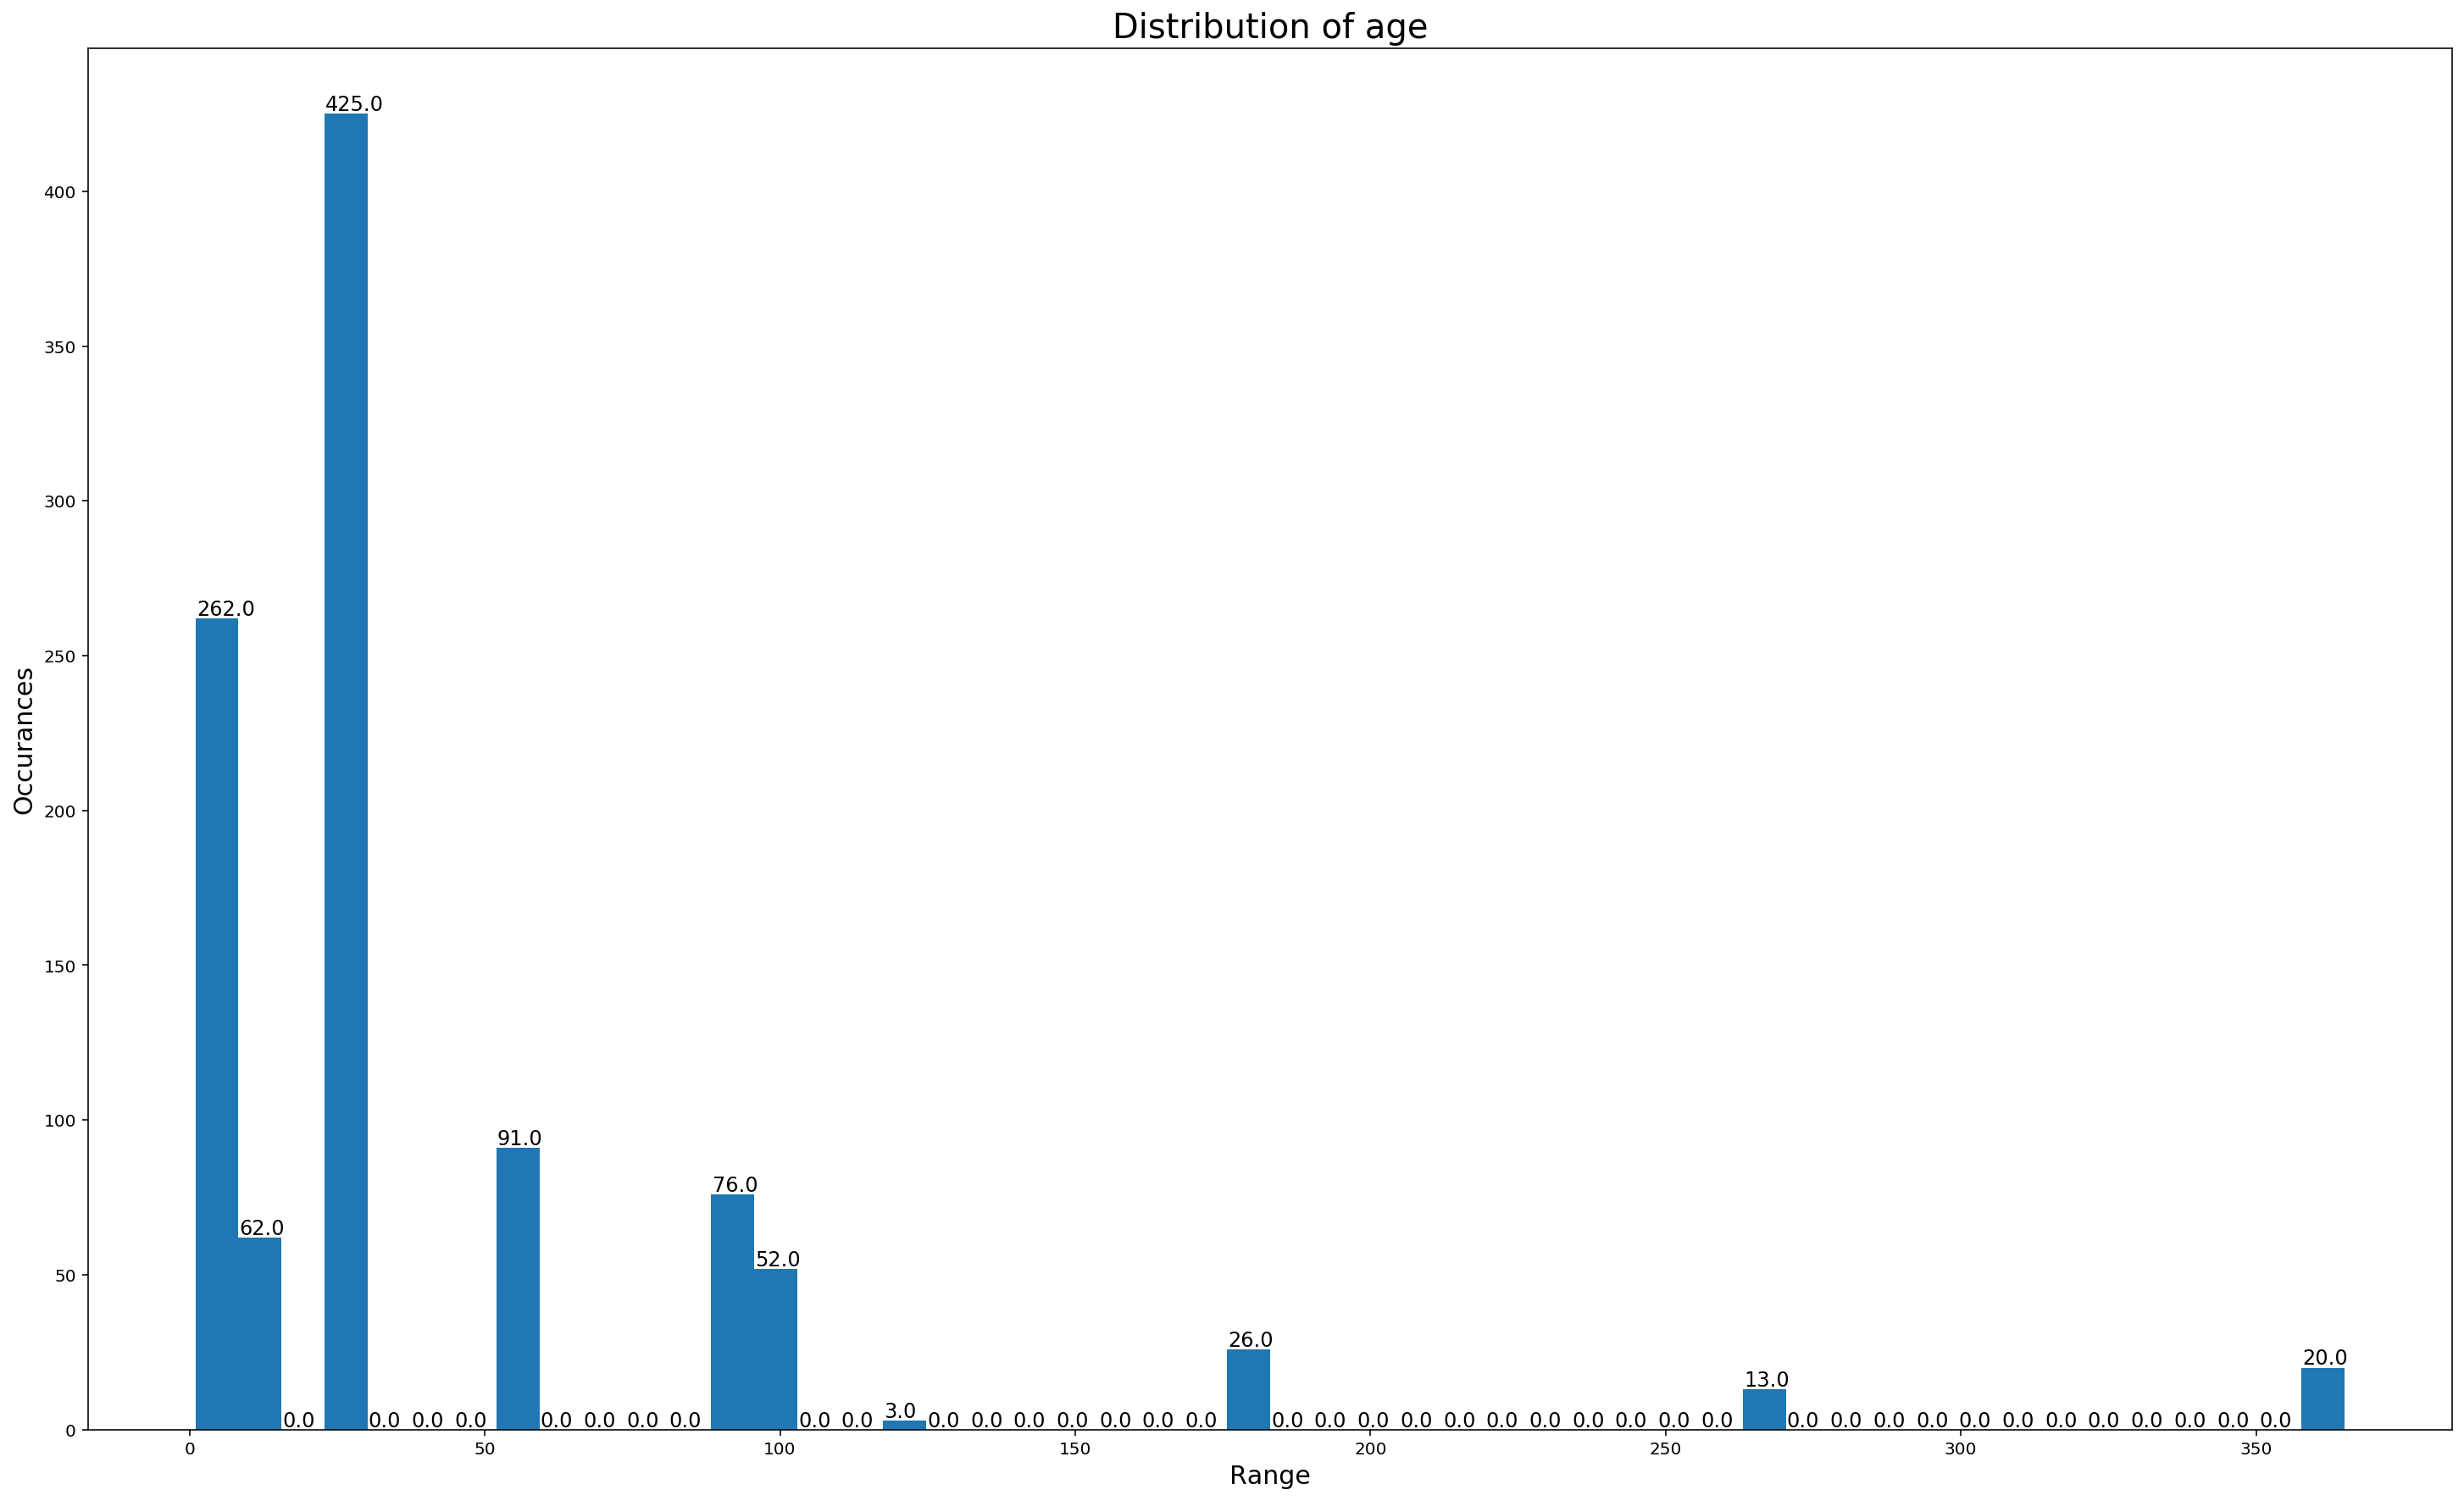

In [45]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of age", fontsize = 20)

plt.hist(data.age,bins = 50, histtype = 'bar', range = (data.age.min(),data.age.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

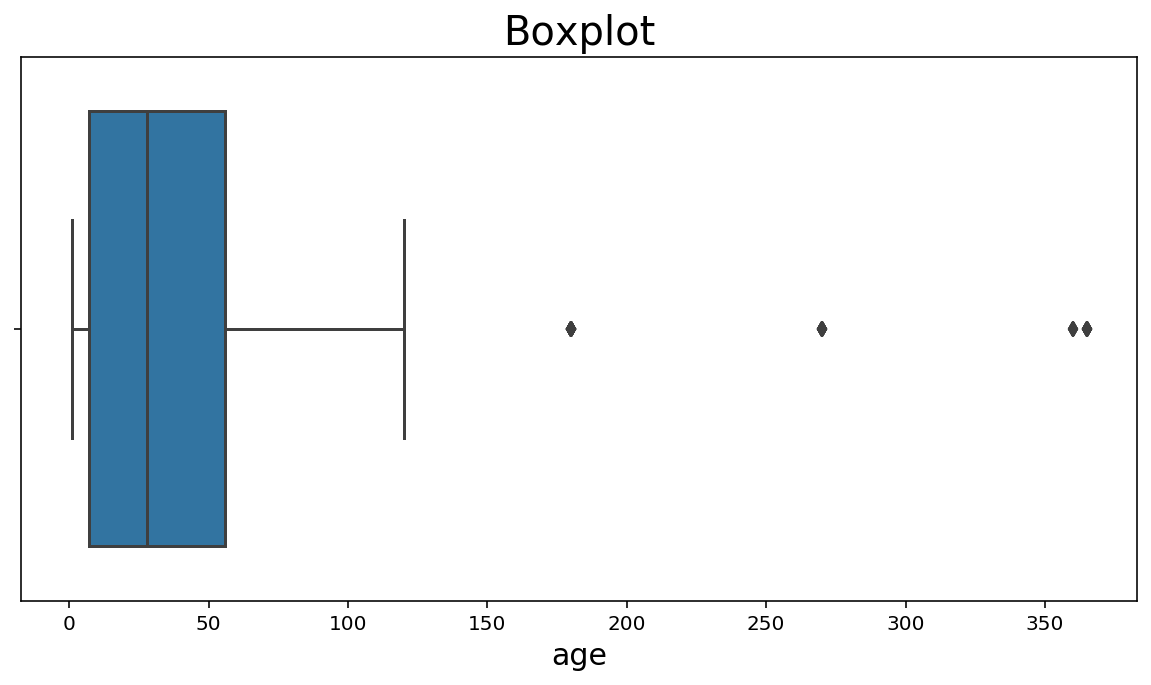

In [46]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['age'], data=data, ax = ax)

**This feature seems extremely skewed right, and there is a lot of outliers. Treating this dataset and the outliers might be one strategy we will have to take later on**

### Target Variable: Strength 

In [47]:
print("Min Value = ", data.strength.quantile(0))
print("Q1 or 25% = ", data.strength.quantile(0.25))
print("Q2/Median = ", data.strength.quantile(0.5))
print("Q3 or 75% = ", data.strength.quantile(0.75))
print("Max value = ", data.strength.quantile(1))
print("Interquartile Range = ", stats.iqr(data.strength))
print("Mean value = %.3f" % np.mean(data.strength))

Min Value =  2.33
Q1 or 25% =  23.709999999999997
Q2/Median =  34.445
Q3 or 75% =  46.135000000000005
Max value =  82.6
Interquartile Range =  22.425000000000008
Mean value = 35.818


In [48]:
print("The list of outliers is: ")
outliers(data.strength)

The list of outliers is: 
[]


In [49]:
out = []

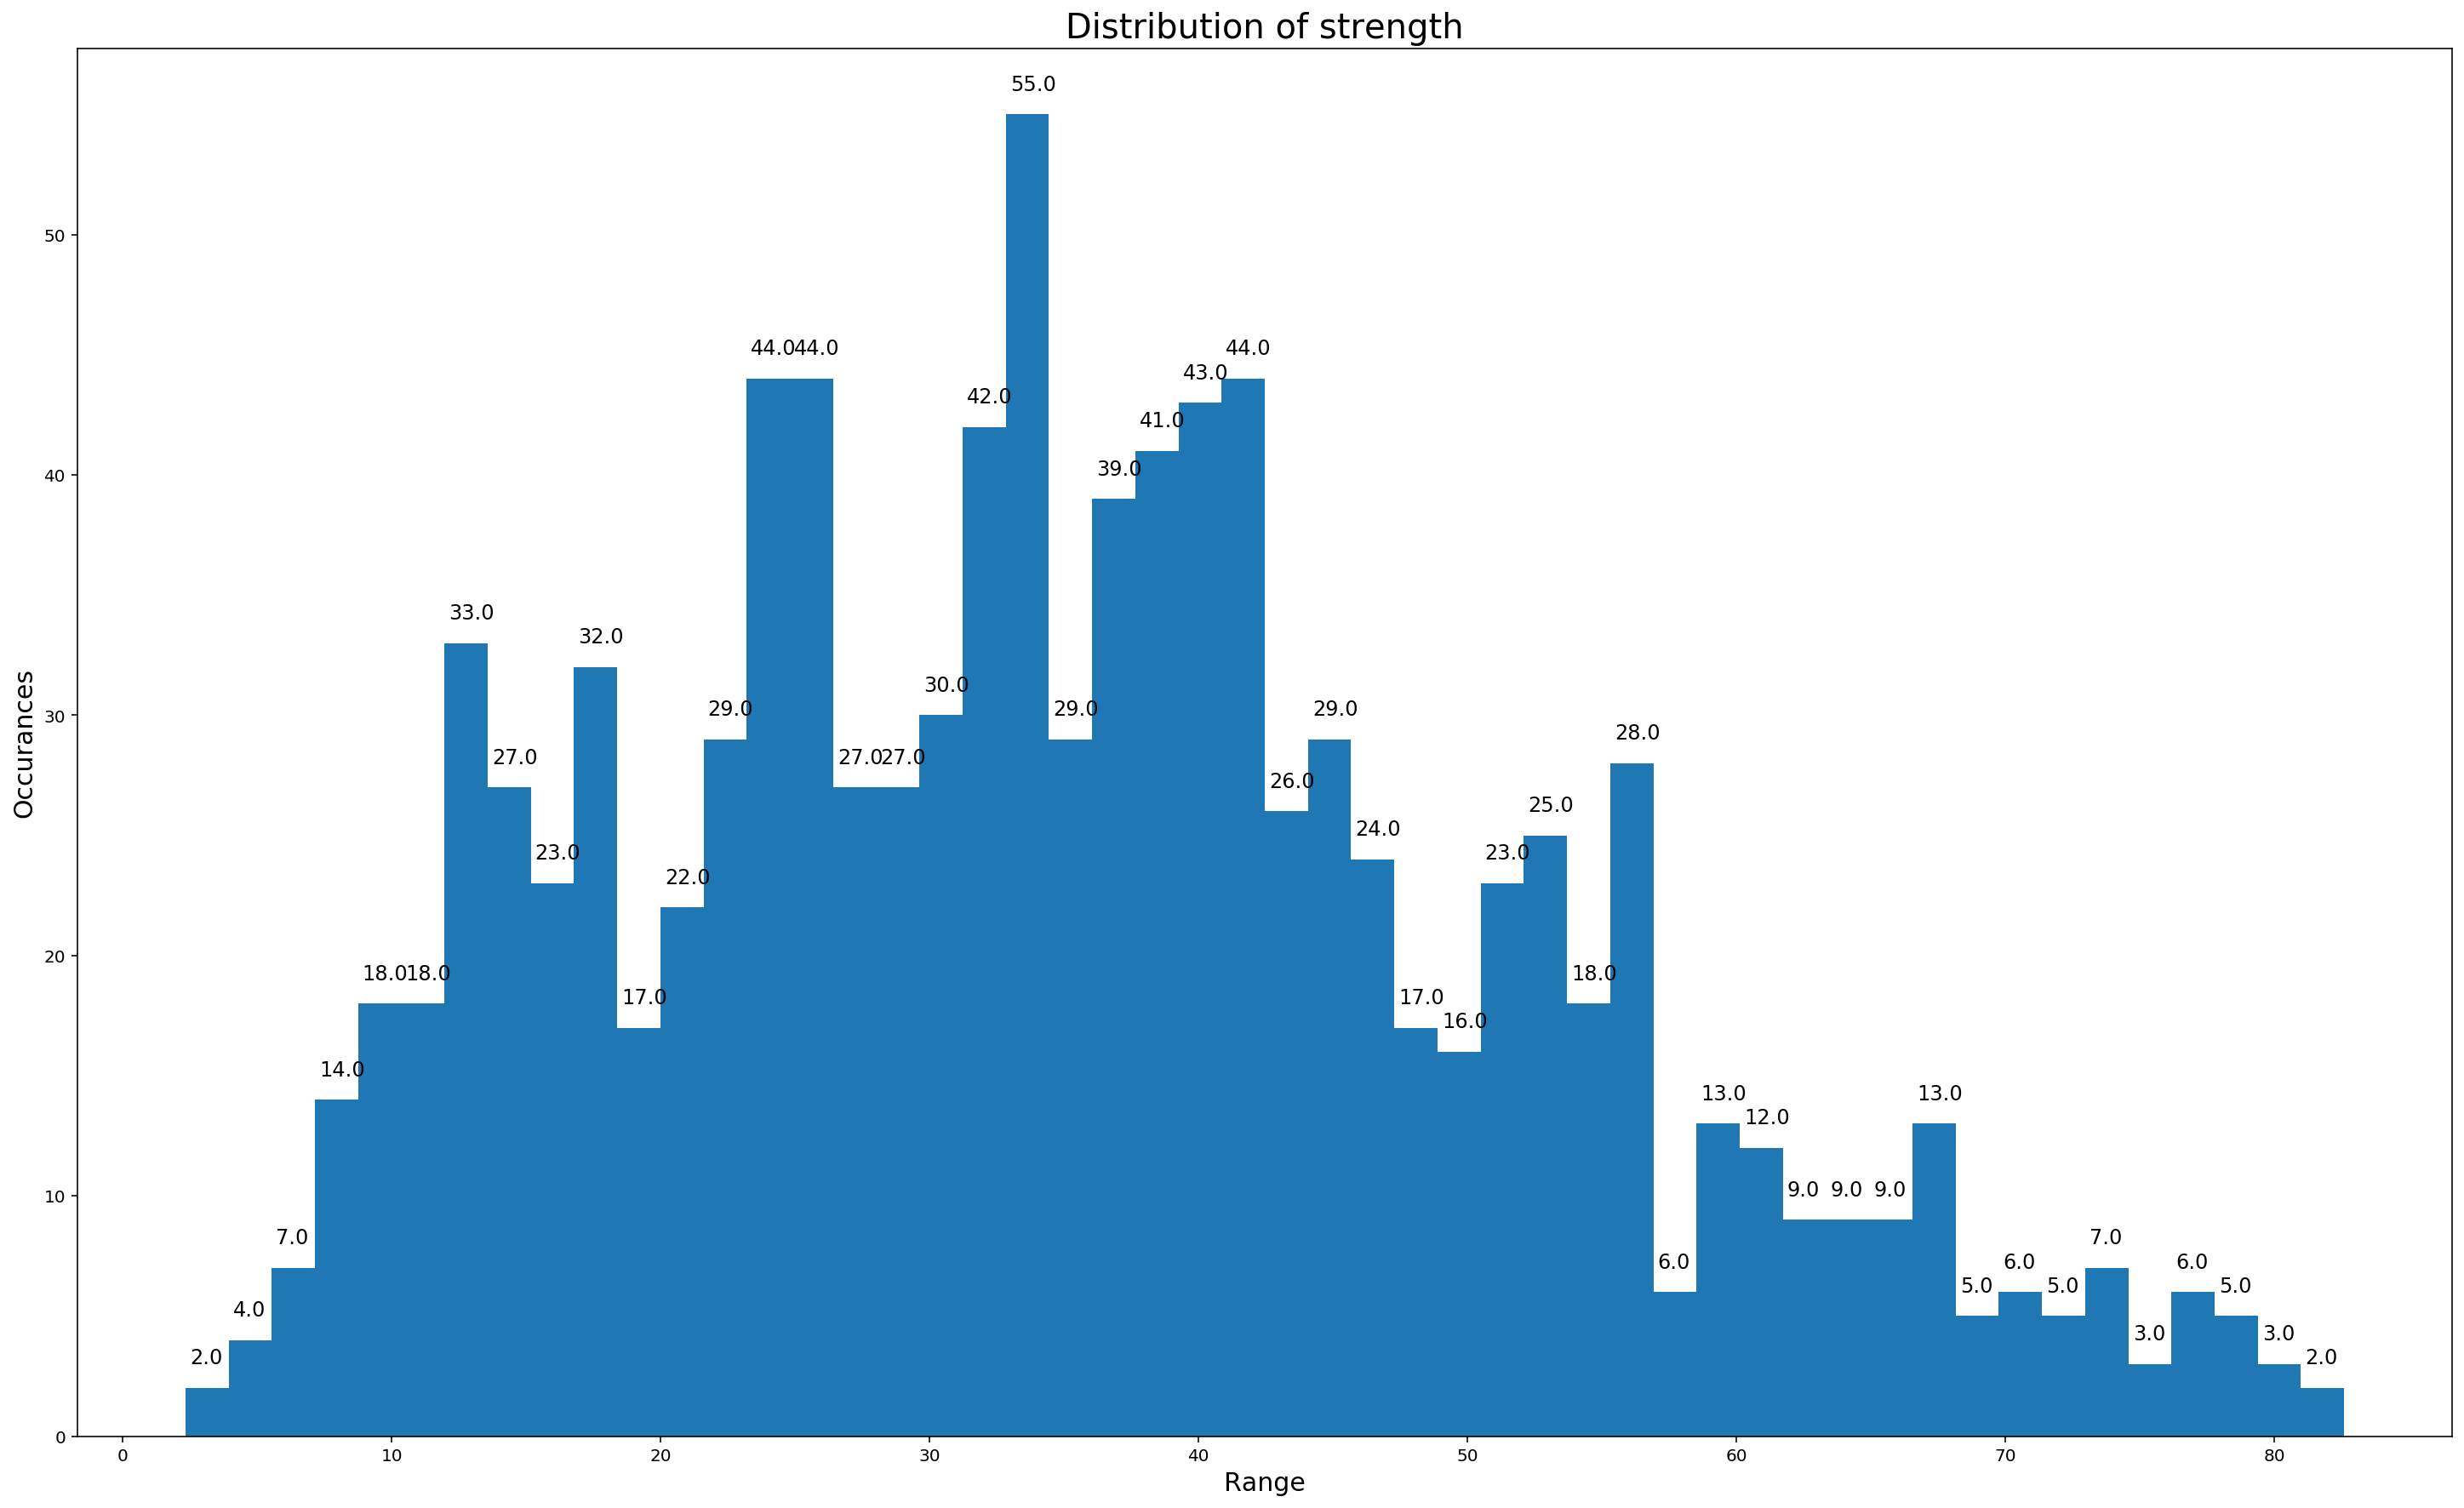

In [50]:
fig, ax = plt.subplots()

fig.set_size_inches(25,15)

ax.set_xlabel("Range", fontsize = 15)

ax.set_ylabel("Occurances", fontsize = 15)

ax.set_title("Distribution of strength", fontsize = 20)

plt.hist(data.strength,bins = 50, histtype = 'bar', range = (data.strength.min(),data.strength.max()));
for i in ax.patches:
    ax.text(i.get_x()+0.16, i.get_height()+1, str(round((i.get_height()), 1)), fontsize=12, color='black')

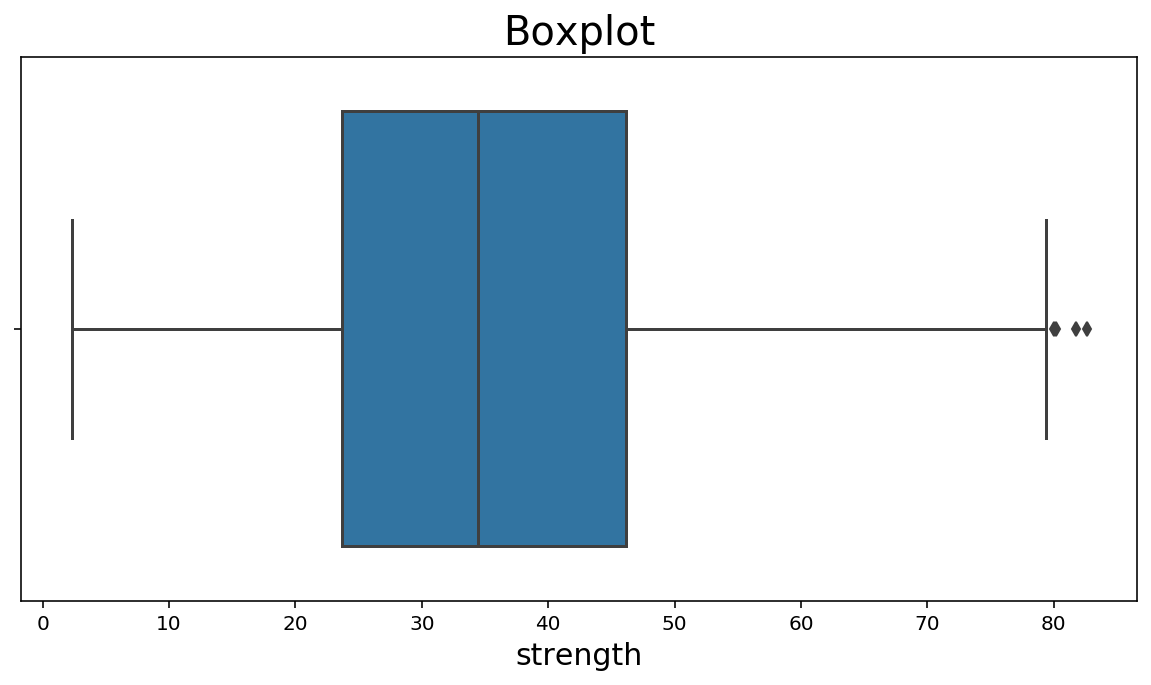

In [51]:
fig, ax = plt.subplots()

fig.set_size_inches(10,5)

ax.set_xlabel("", fontsize = 15)

ax.set_title("Boxplot", fontsize = 20)

sns.boxplot(x=data['strength'], data=data, ax = ax)

**The data seems pretty evenly distributed, but with slight skewness to the right**

**Now, we can move on to Bi-Variate Analysis**

## Bi-Variate Analysis 

### Cement vs. Strength 

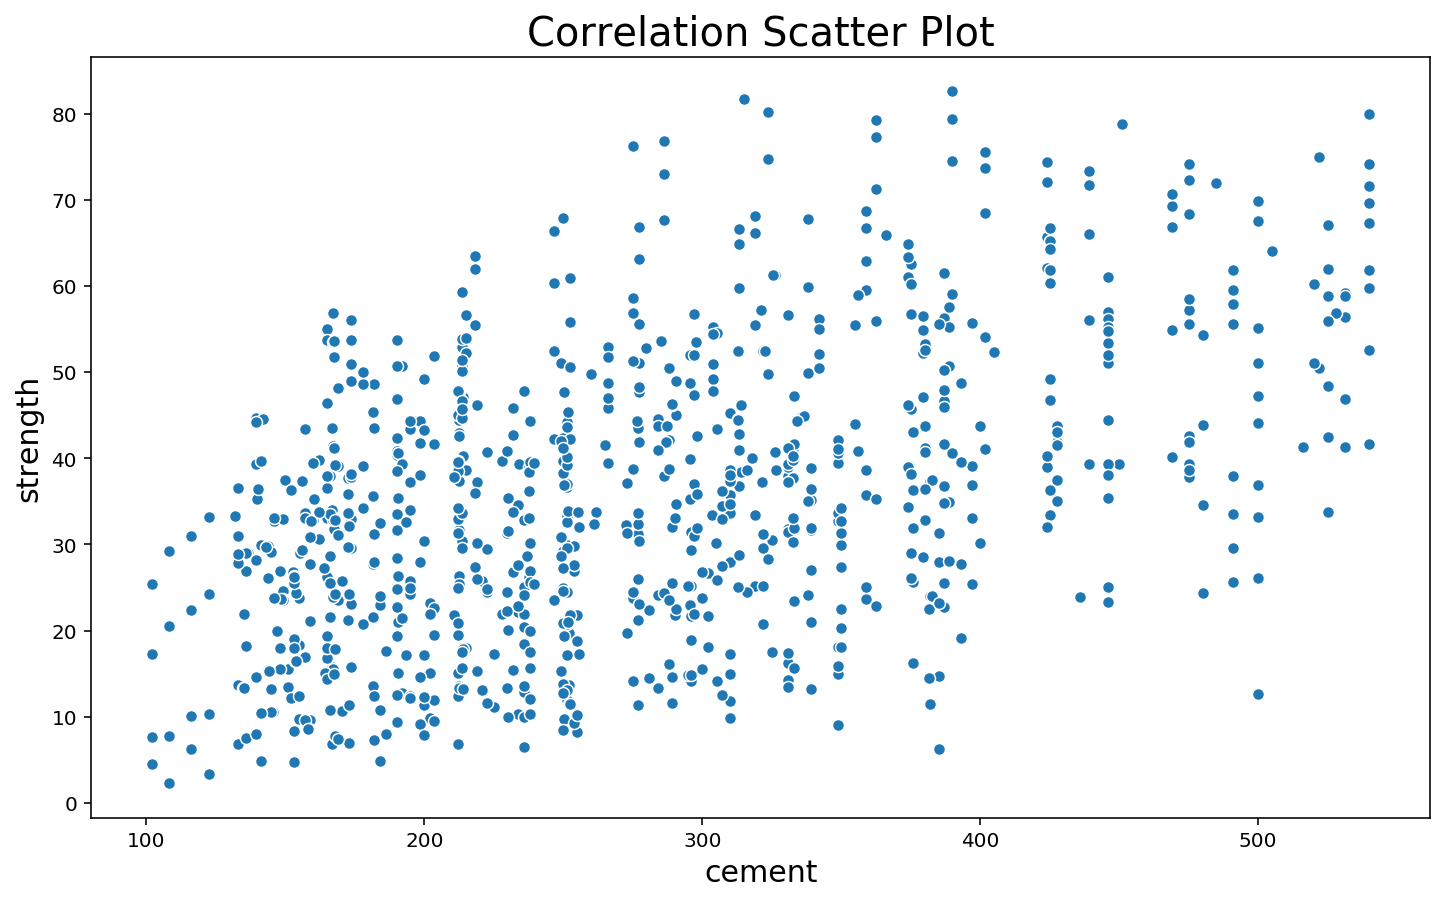

In [52]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.cement, data.strength, ax=ax);

In [53]:
pr, _ = pearsonr(data.cement, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: 0.498


**We see from above that there is a good positive correlation between Cement and Strength in this dataset**

### Slag vs. Strength 

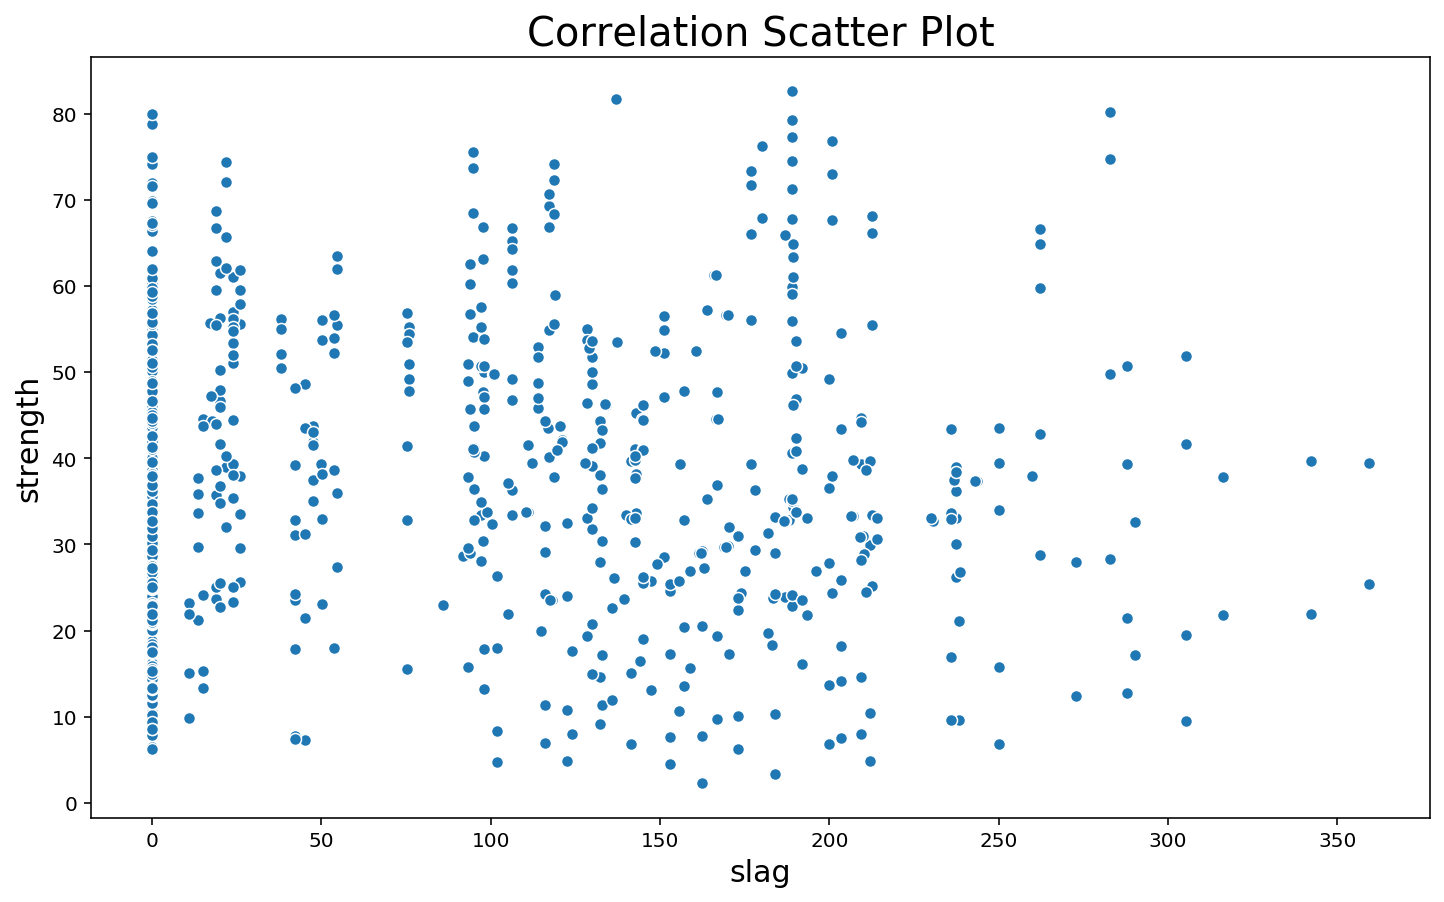

In [54]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.slag, data.strength, ax=ax);

In [55]:
pr, _ = pearsonr(data.slag, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: 0.135


**We see that there is a very mild positive correlation between Strength and Slag**

### Ash vs. Strength 

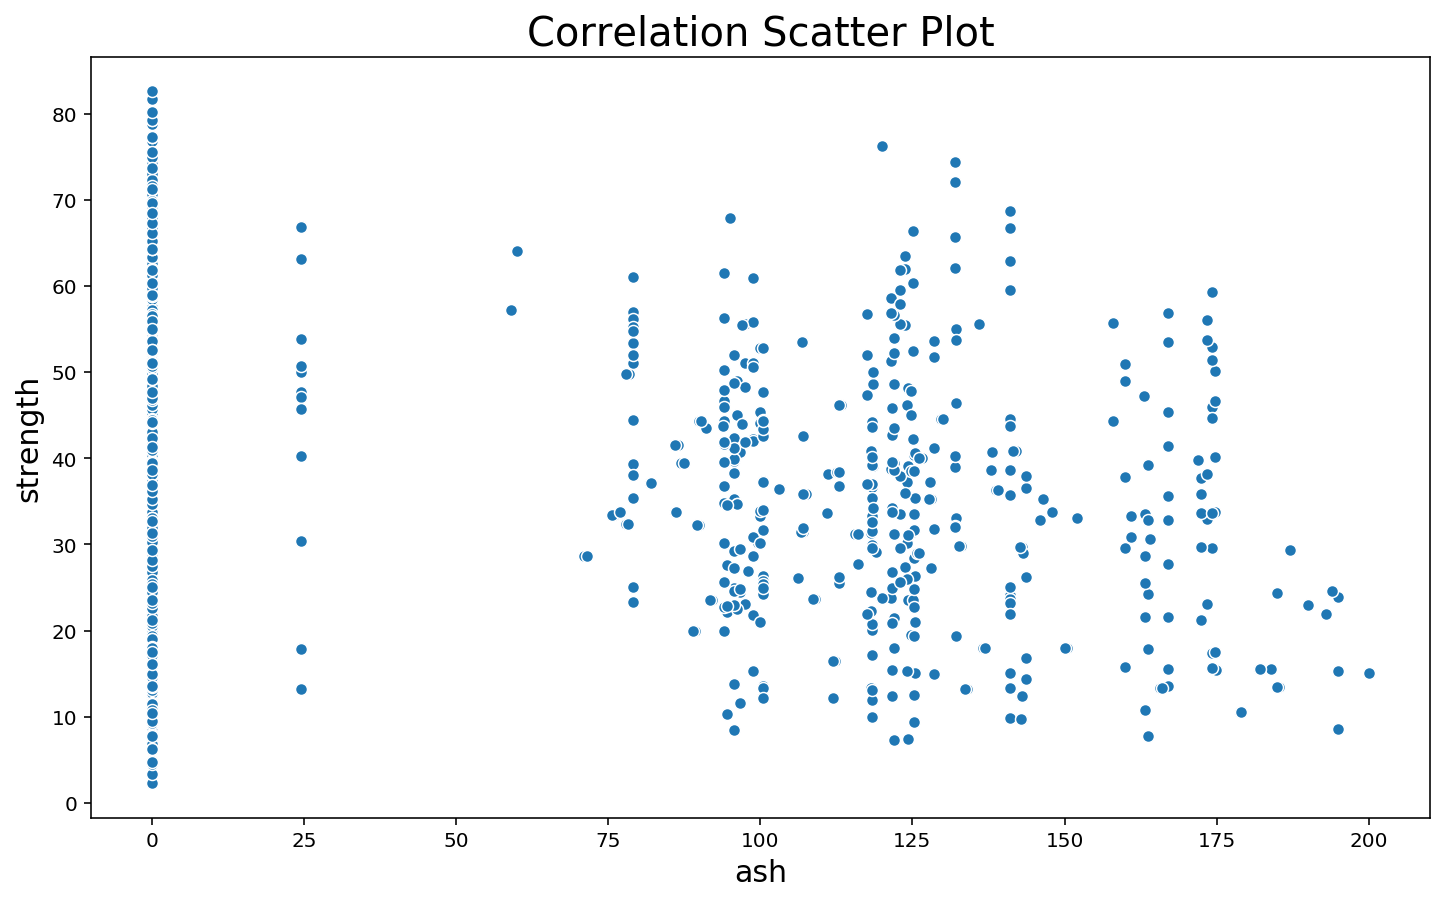

In [56]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.ash, data.strength, ax=ax);

In [57]:
pr, _ = pearsonr(data.ash, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: -0.106


**We see that there is a negative correlation between Ash and strength, though it is very mild**

### Water vs. Strength 

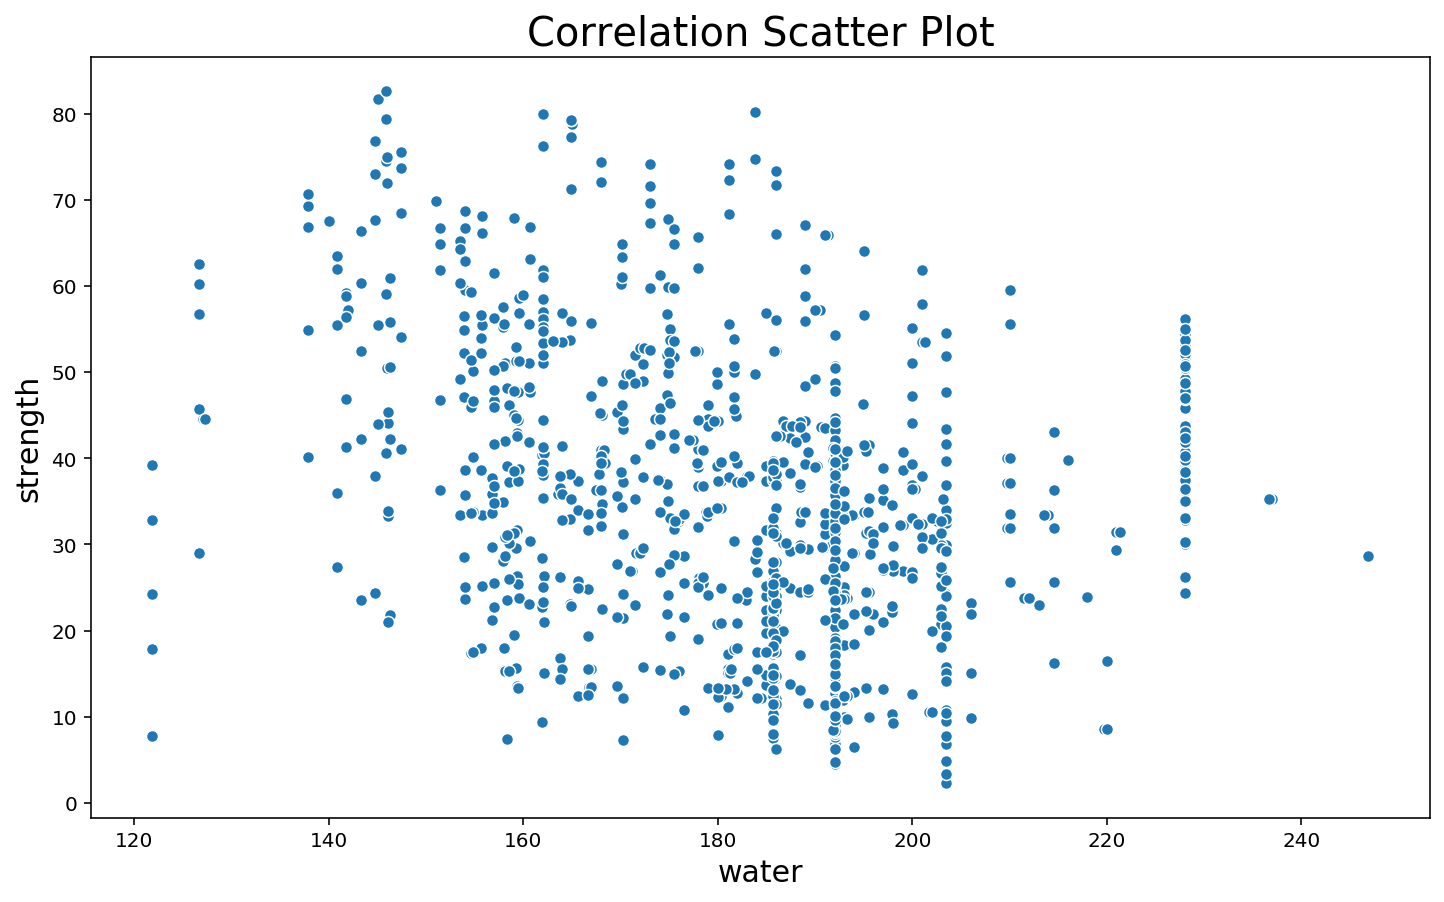

In [58]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.water, data.strength, ax=ax);

In [59]:
pr, _ = pearsonr(data.water, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: -0.290


**Here as well, we see a slightly more but still mild and negative correlation between water and strength**

### Superplastic vs. Strength

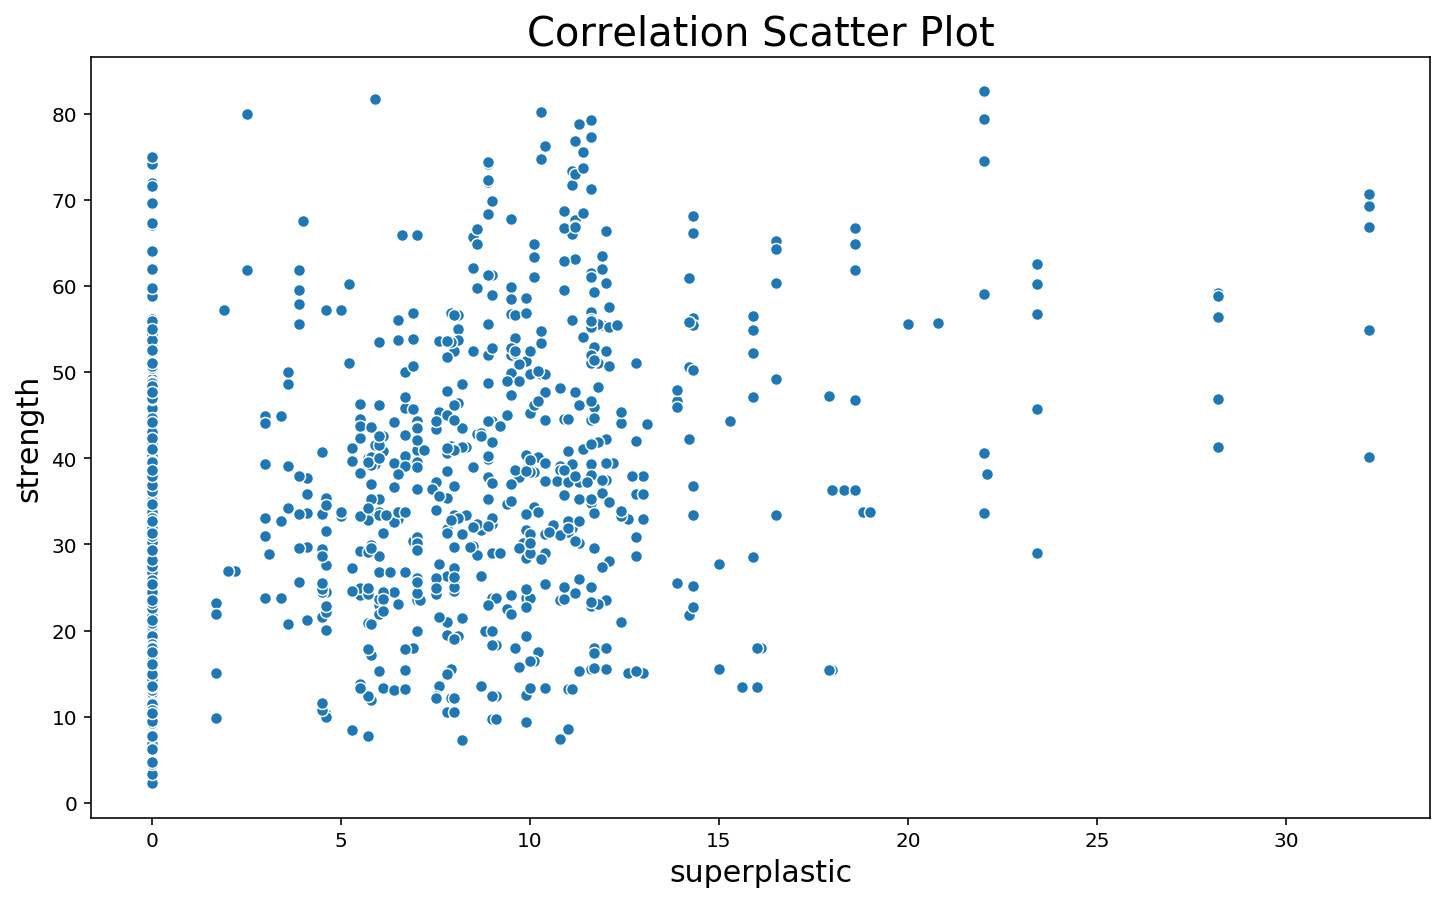

In [60]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.superplastic, data.strength, ax=ax);

In [61]:
pr, _ = pearsonr(data.superplastic, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: 0.366


**Here we see a decent positive correlation between Superplastic and Strength**

### Coarseagg vs. Strength 

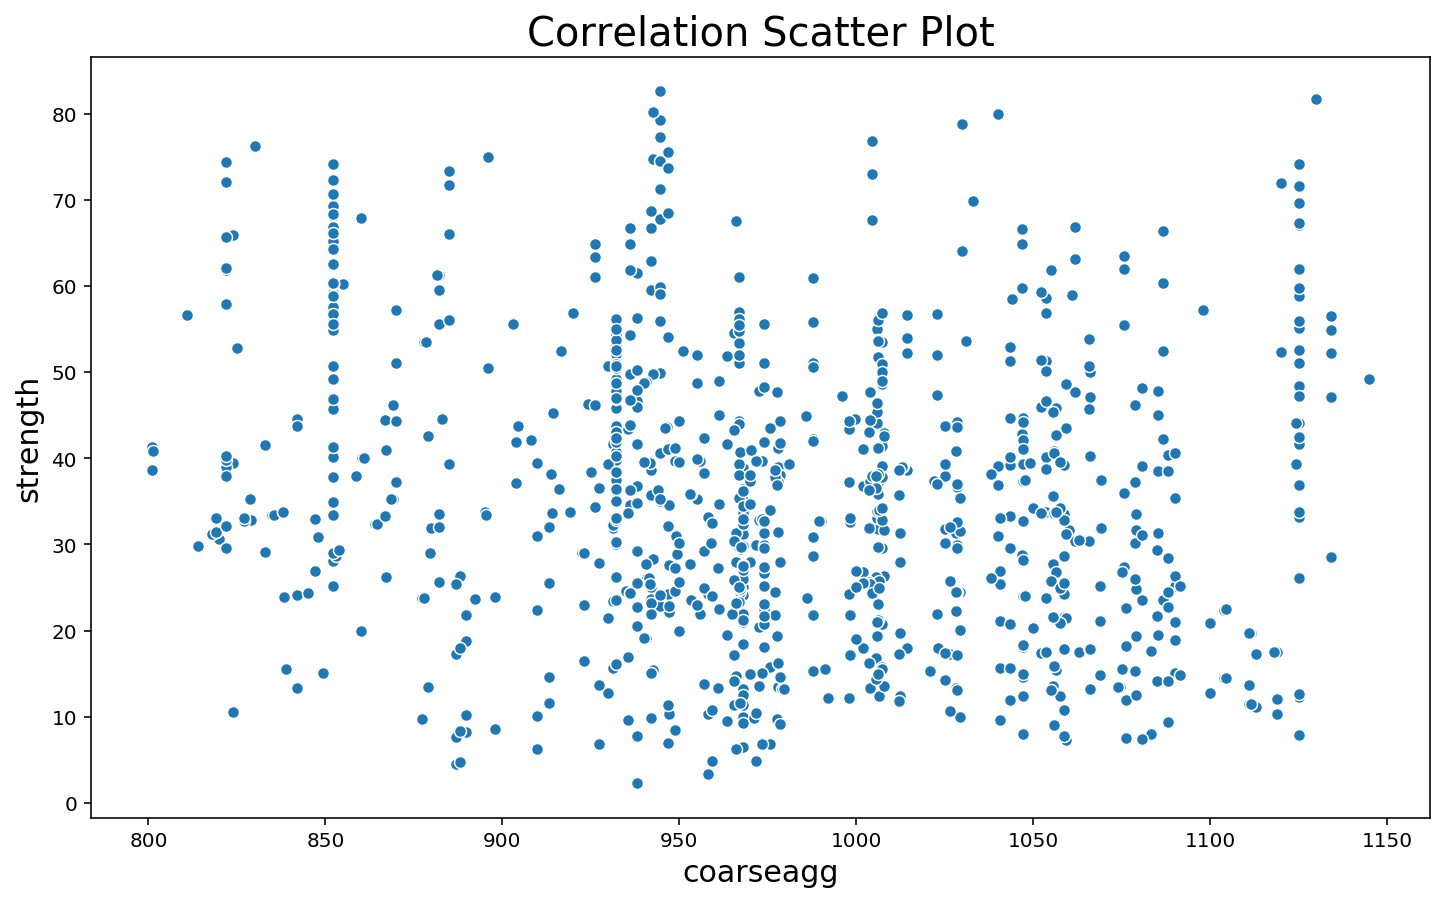

In [62]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.coarseagg, data.strength, ax=ax);

In [63]:
pr, _ = pearsonr(data.coarseagg, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: -0.165


**There seems to be a mild but negative correlation between coarseagg and strength**

### Fineagg vs. Strength 

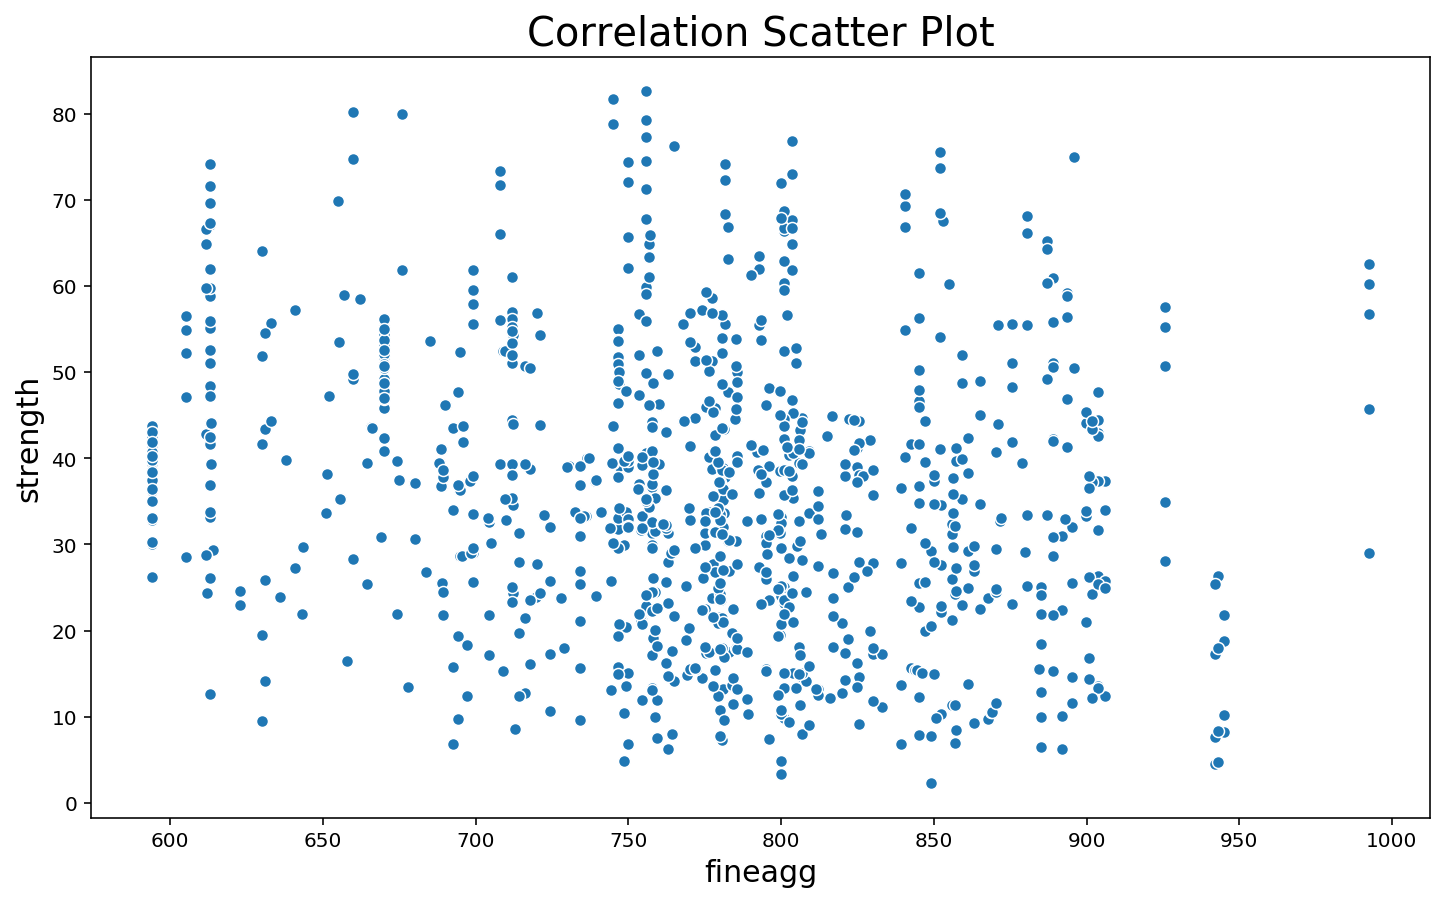

In [64]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.fineagg, data.strength, ax=ax);

In [65]:
pr, _ = pearsonr(data.fineagg, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: -0.167


**Fineagg and strength have negative correlation. Also, an interesting thing is that fineagg and coarseagg have coincidently similar correlations to strength**

### Age vs. Strength 

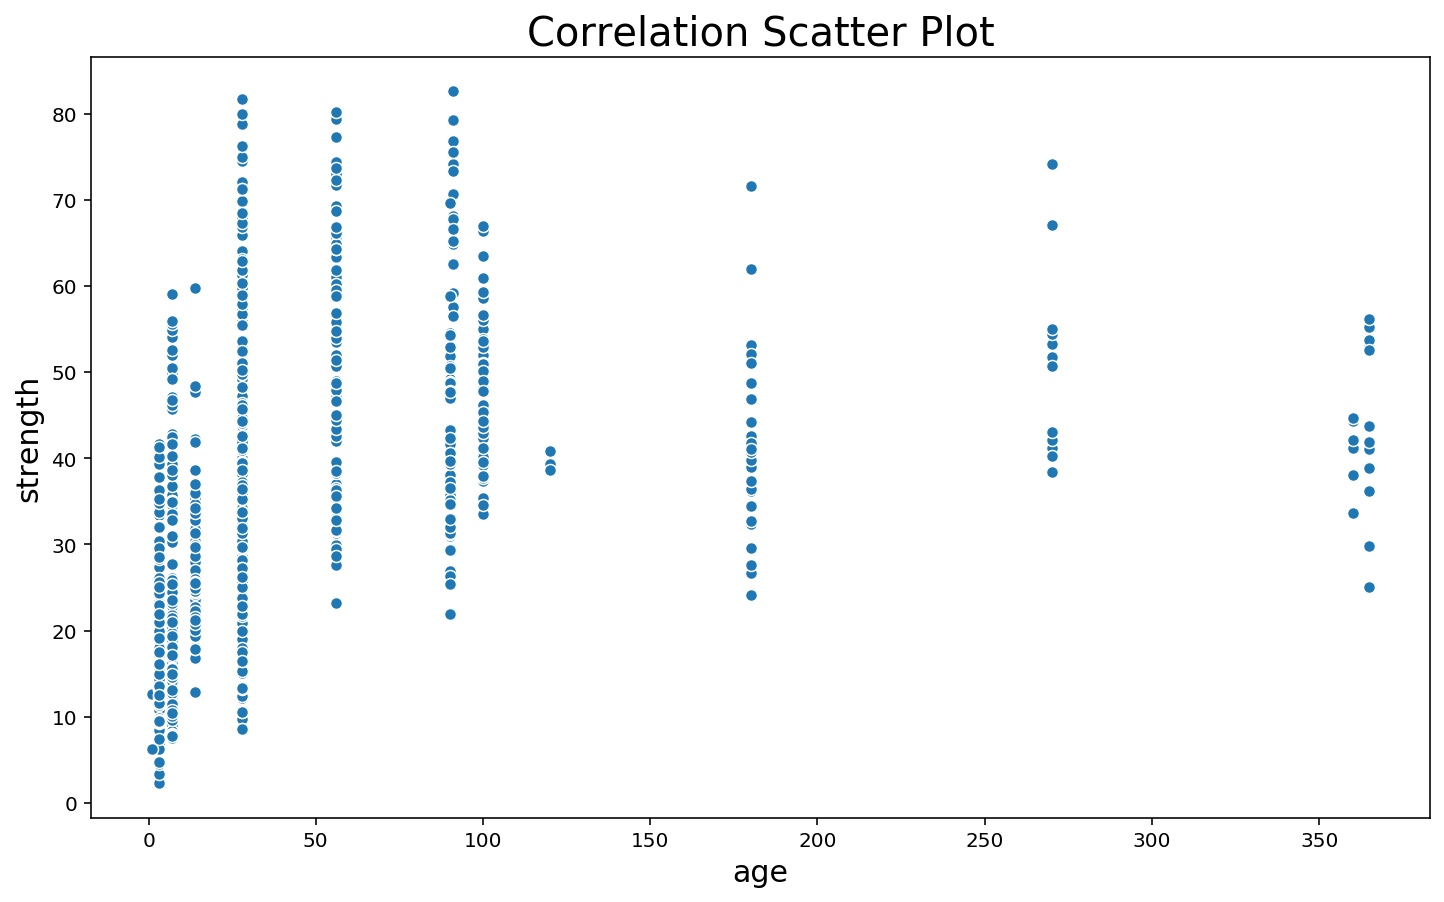

In [66]:
fig, ax = plt.subplots()

fig.set_size_inches(12,7)

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Correlation Scatter Plot", fontsize = 20)


sns.scatterplot(data.age, data.strength, ax=ax);

In [67]:
pr, _ = pearsonr(data.age, data.strength)
print('Pearsons correlation: %.3f' % pr)

Pearsons correlation: 0.329


**We see a decent and positive correlation between Age and strength**

**We have completed bi-variate analysis. We can move on to multi-variate analysis now.**

## Multi-variate Analysis 

### Pairplot

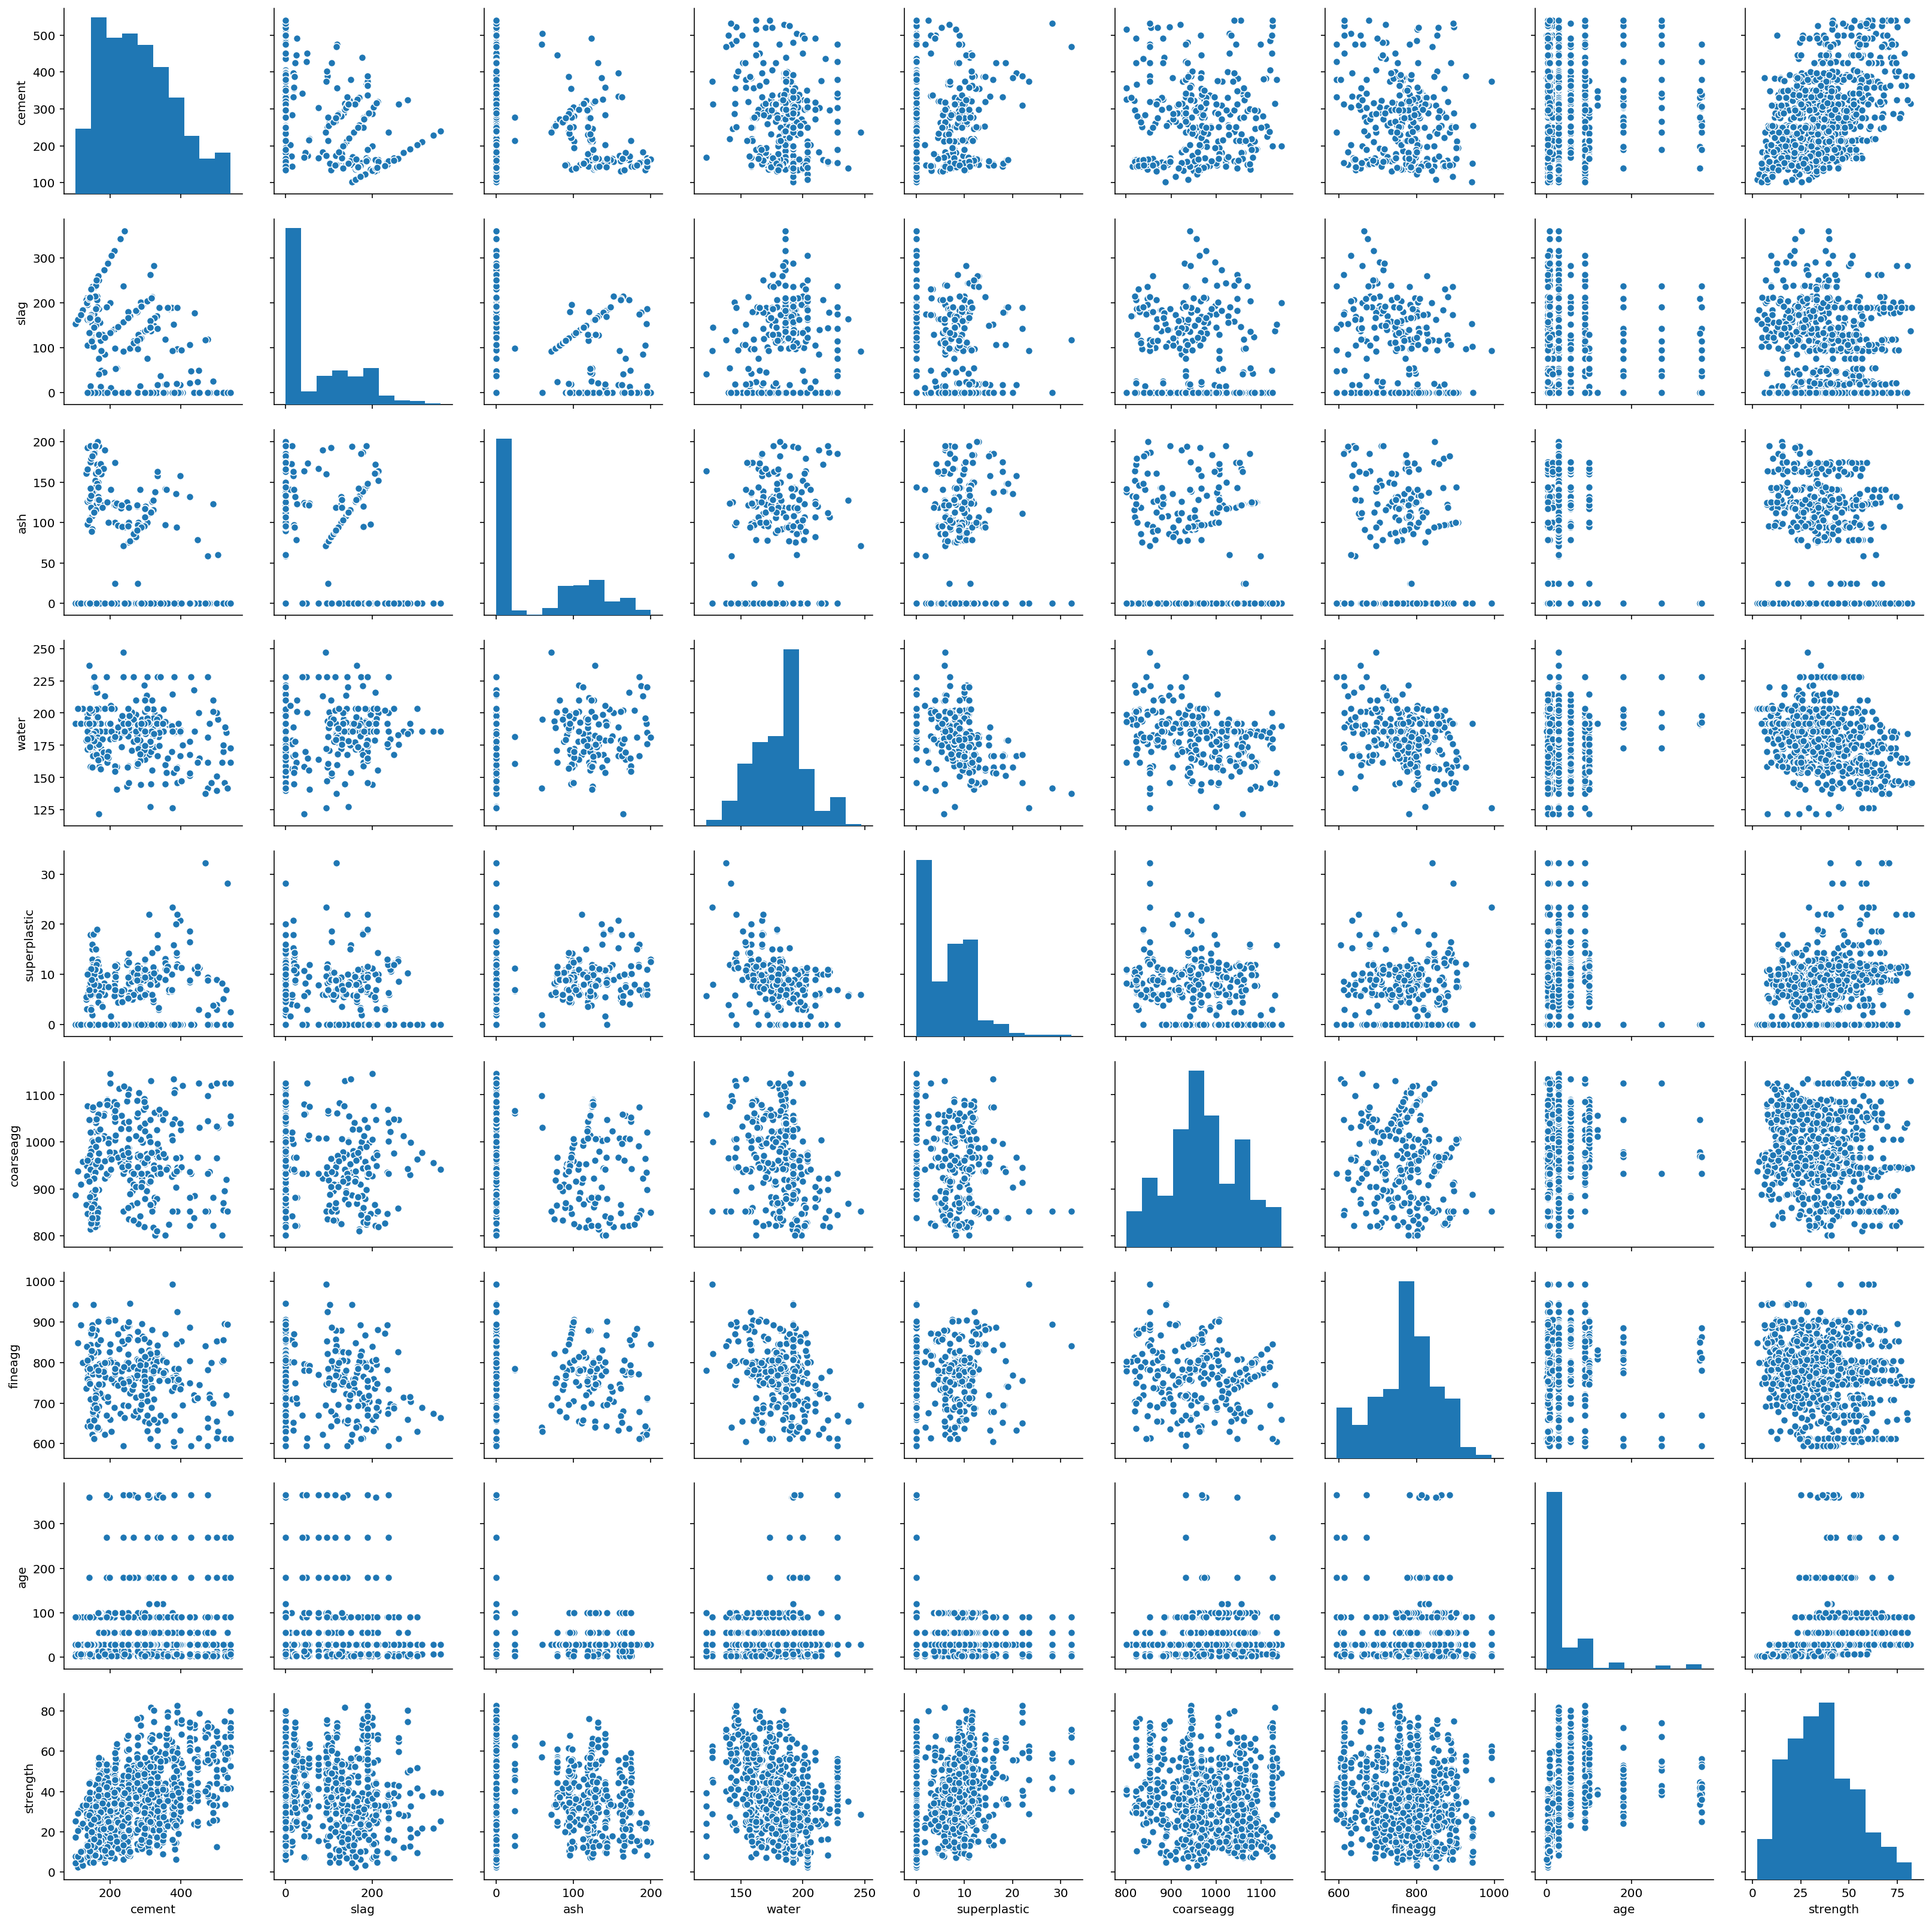

In [68]:
sns.pairplot(data)

In [69]:
cor = data.corr()
print(cor)

                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water    

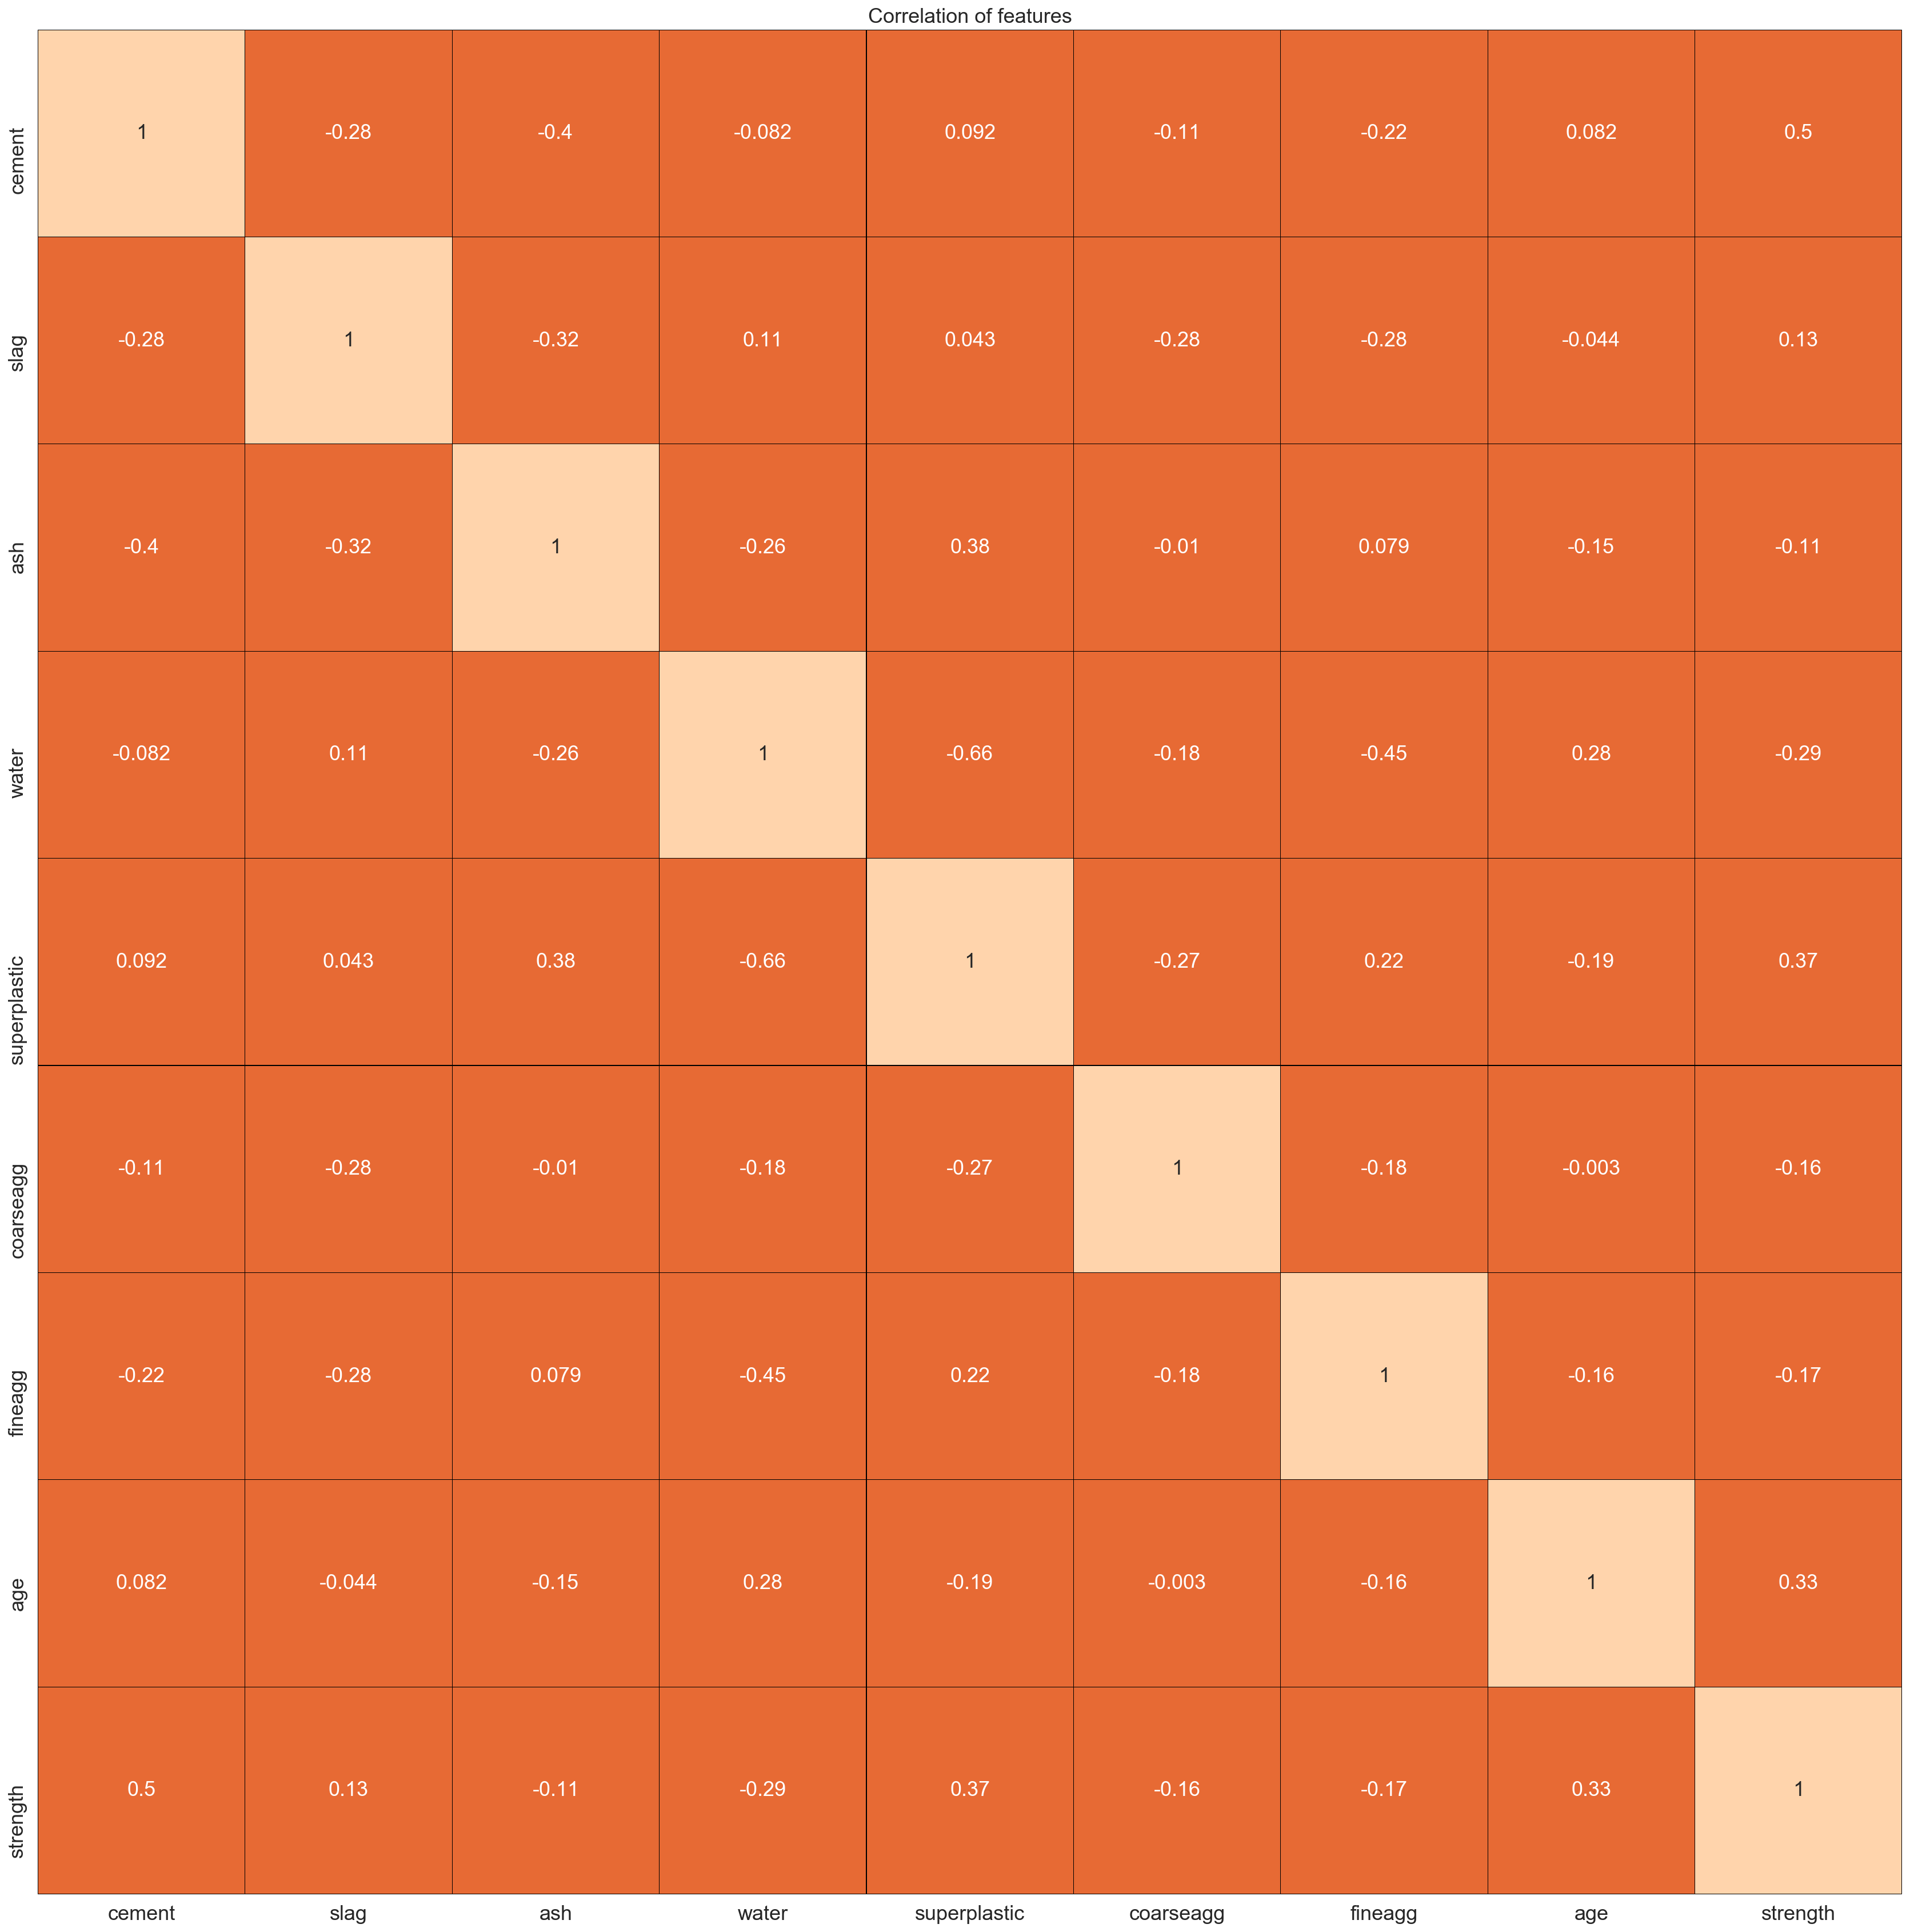

In [70]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(cor,vmin=0.7, annot=True,linewidths=0.02,center=0,linecolor="black",cbar=False,square=True)
plt.title('Correlation of features',fontsize=18)
ax.tick_params(labelsize=18)

**We find similar observations to the individual correlations as we saw above. The multi-variate analysis is now complete.**

# Part 2: Feature Selection 

We see from above that there are some different ranges for the dataset, and hence, using a standardized dataset will be helpful. We shall do the same by applying zscore on the dataset and carrying forward with our model building and tuning using that dataset.

In [71]:
dataz = data.apply(zscore) 
dataz = pd.DataFrame(dataz , columns  = data.columns)
dataz.describe()

cement          slag           ash         water  superplastic  \
count  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03   
mean  -3.858833e-16  9.593189e-18  3.634633e-16 -2.014570e-16  1.103756e-16   
std    1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00   
min   -1.715253e+00 -8.568879e-01 -8.471439e-01 -2.800211e+00 -1.039143e+00   
25%   -8.500535e-01 -8.568879e-01 -8.471439e-01 -7.808939e-01 -1.039143e+00   
50%   -7.915193e-02 -6.017783e-01 -8.471439e-01  1.608294e-01  3.271508e-02   
75%    6.589606e-01  8.007446e-01  1.002278e+00  4.887927e-01  6.691307e-01   
max    2.477915e+00  3.310675e+00  2.281084e+00  3.065647e+00  4.353642e+00   

          coarseagg       fineagg           age      strength  
count  1.030000e+03  1.030000e+03  1.030000e+03  1.030000e+03  
mean   7.116206e-16  9.537139e-16  3.794160e-17 -3.729487e-17  
std    1.000486e+00  1.000486e+00  1.000486e+00  1.000486e+00  
min   -2.212138e+00 -2.240917e+00 -7.073594e-01 -2.005552e+00  
25%   -5.265174e-01 -5.319697e-01 -6.123314e-01 -7.251305e-01  
50%   -6.329352e-02  7.386739e-02 -2.797331e-01 -8.222491e-02  
75%    7.267605e-01  6.291661e-01  1.637312e-01  6.178744e-01  
max    2.214224e+00  2.733062e+00  5.057677e+00  2.801717e+00

**Splitting into dependant and independant variables**

In [72]:
x=dataz.loc[:,dataz.columns!='strength']
y=dataz.loc[:,dataz.columns=='strength']

**Train-test-Split**

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

**Decision Tree Regressor**

In [74]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

**Checking Feature Importance**

In [75]:
importances = pd.DataFrame(model.feature_importances_, index = data.drop('strength', axis = 1).columns, columns = ["Importance"])
print(importances)

              Importance
cement          0.380483
slag            0.088169
ash             0.010590
water           0.115387
superplastic    0.028983
coarseagg       0.028500
fineagg         0.028022
age             0.319865


In [76]:
importance2=importances.sort_values(by = "Importance", ascending = False)

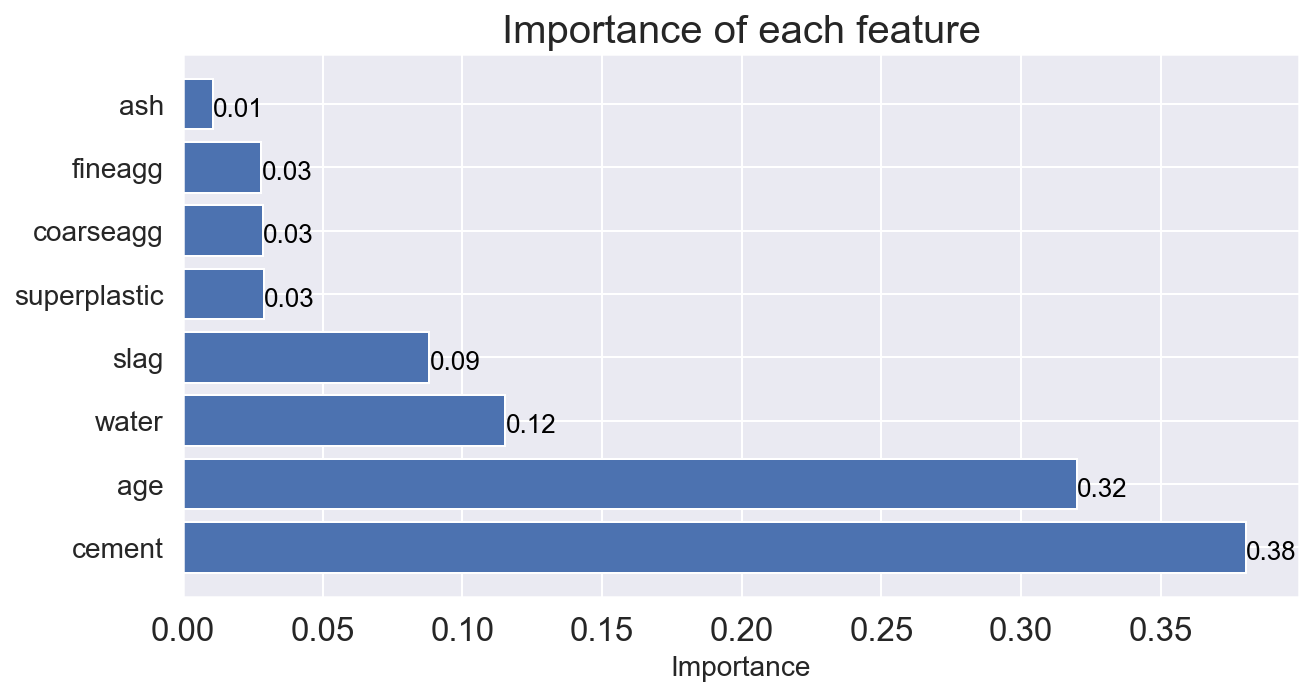

In [77]:
fig, ax = plt.subplots(figsize = (10,5))
ax.barh(importance2.index, importance2.Importance)
ax.set_yticks(importance2.index)
ax.set_yticklabels(importance2.index, fontsize = "14")
ax.set_xlabel('Importance', fontsize = "14")
ax.set_title('Importance of each feature', fontsize = "20")
for i in ax.patches:
    ax.text(i.get_width()+0.0001, i.get_y()+0.21, str(round((i.get_width()), 2)), fontsize=13, color='black')

In [78]:
model.score(x_test,y_test)

0.841646570328753

In [79]:
model.score(x_train,y_train)

0.9955841440108214

**We see from above that we are getting a score of 84%. But the features ash, fineagg, superplastic, coarseagg are all affecting only below 3% individually and below 10% combined. Hence, we can drop these features and retry the model**

In [80]:
y2 = y.copy()

In [81]:
x2 = x.drop(["ash", "fineagg", "superplastic", "coarseagg"], axis = 1)

In [82]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=2)

In [83]:
model2 = DecisionTreeRegressor()
model2.fit(x2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [84]:
importances2 = pd.DataFrame(model2.feature_importances_, index = x2.columns, columns = ["Importance"])
print(importances2)

        Importance
cement    0.423574
slag      0.109210
water     0.147341
age       0.319874


In [85]:
model2.score(x2_test,y2_test)

0.8588812602017324

In [86]:
model2.score(x2_train,y2_train)

0.9932122399899931

**We see that we have improved the model score to 86% from before. We can retry this by dropping slag as well**

In [87]:
y3 = y.copy()

In [88]:
x3 = x.drop(["ash", "fineagg", "superplastic", "coarseagg", "slag"], axis = 1)

In [89]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.3,random_state=2)

In [90]:
model3 = DecisionTreeRegressor()
model3.fit(x3_train,y3_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [91]:
importances3 = pd.DataFrame(model3.feature_importances_, index = x3.columns, columns = ["Importance"])
print(importances3)

        Importance
cement    0.459070
water     0.218113
age       0.322817


In [92]:
model3.score(x3_test,y3_test)

0.6696250652741906

In [93]:
model3.score(x3_train,y3_train)

0.989951702949741

**We see that dropping slag is not the right way as our score has dropped all the way to 66%. Hence, x2,y2 and model2 are best to use for building the decision tree**

# Part 3: Model Building with best hyperparameter search

In [94]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

In [95]:
grid_cv_model2 = GridSearchCV(model2, param_grid, cv=5)

grid_cv_model2.fit(x2,y2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                 

In [96]:
print("R-Squared::{}".format(grid_cv_model2.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_model2.best_params_))

R-Squared::0.7673456416343821
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


**We have searched and found some best hyperparameters for the model**

In [97]:
df = pd.DataFrame(data=grid_cv_model2.cv_results_)
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002078      0.000380         0.001589        0.000364   
1       0.002587      0.000962         0.001679        0.000392   
2       0.002579      0.000579         0.001588        0.000198   
3       0.002381      0.000371         0.001787        0.000396   
4       0.002083      0.000199         0.001786        0.000398   

  param_criterion param_max_depth param_max_leaf_nodes param_min_samples_leaf  \
0             mse               2                    5                     20   
1             mse               2                    5                     20   
2             mse               2                    5                     20   
3             mse               2                    5                     40   
4             mse               2                    5                     40   

  param_min_samples_split                                             params  \
0                      10  {'criterion': 'mse', 'max_depth': 2, 'max_leaf...   
1                      20  {'criterion': 'mse', 'max_depth': 2, 'max_leaf...   
2                      40  {'criterion': 'mse', 'max_depth': 2, 'max_leaf...   
3                      10  {'criterion': 'mse', 'max_depth': 2, 'max_leaf...   
4                      20  {'criterion': 'mse', 'max_depth': 2, 'max_leaf...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.448191           0.476746           0.480063           0.479006   
1           0.448191           0.476746           0.480063           0.479006   
2           0.448191           0.476746           0.480063           0.479006   
3           0.448191           0.476746           0.480063           0.479006   
4           0.448191           0.476746           0.480063           0.479006   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.359174         0.448636        0.046268              103  
1           0.359174         0.448636        0.046268              103  
2           0.359174         0.448636        0.046268              120  
3           0.359174         0.448636        0.046268              103  
4           0.359174         0.448636        0.046268              103

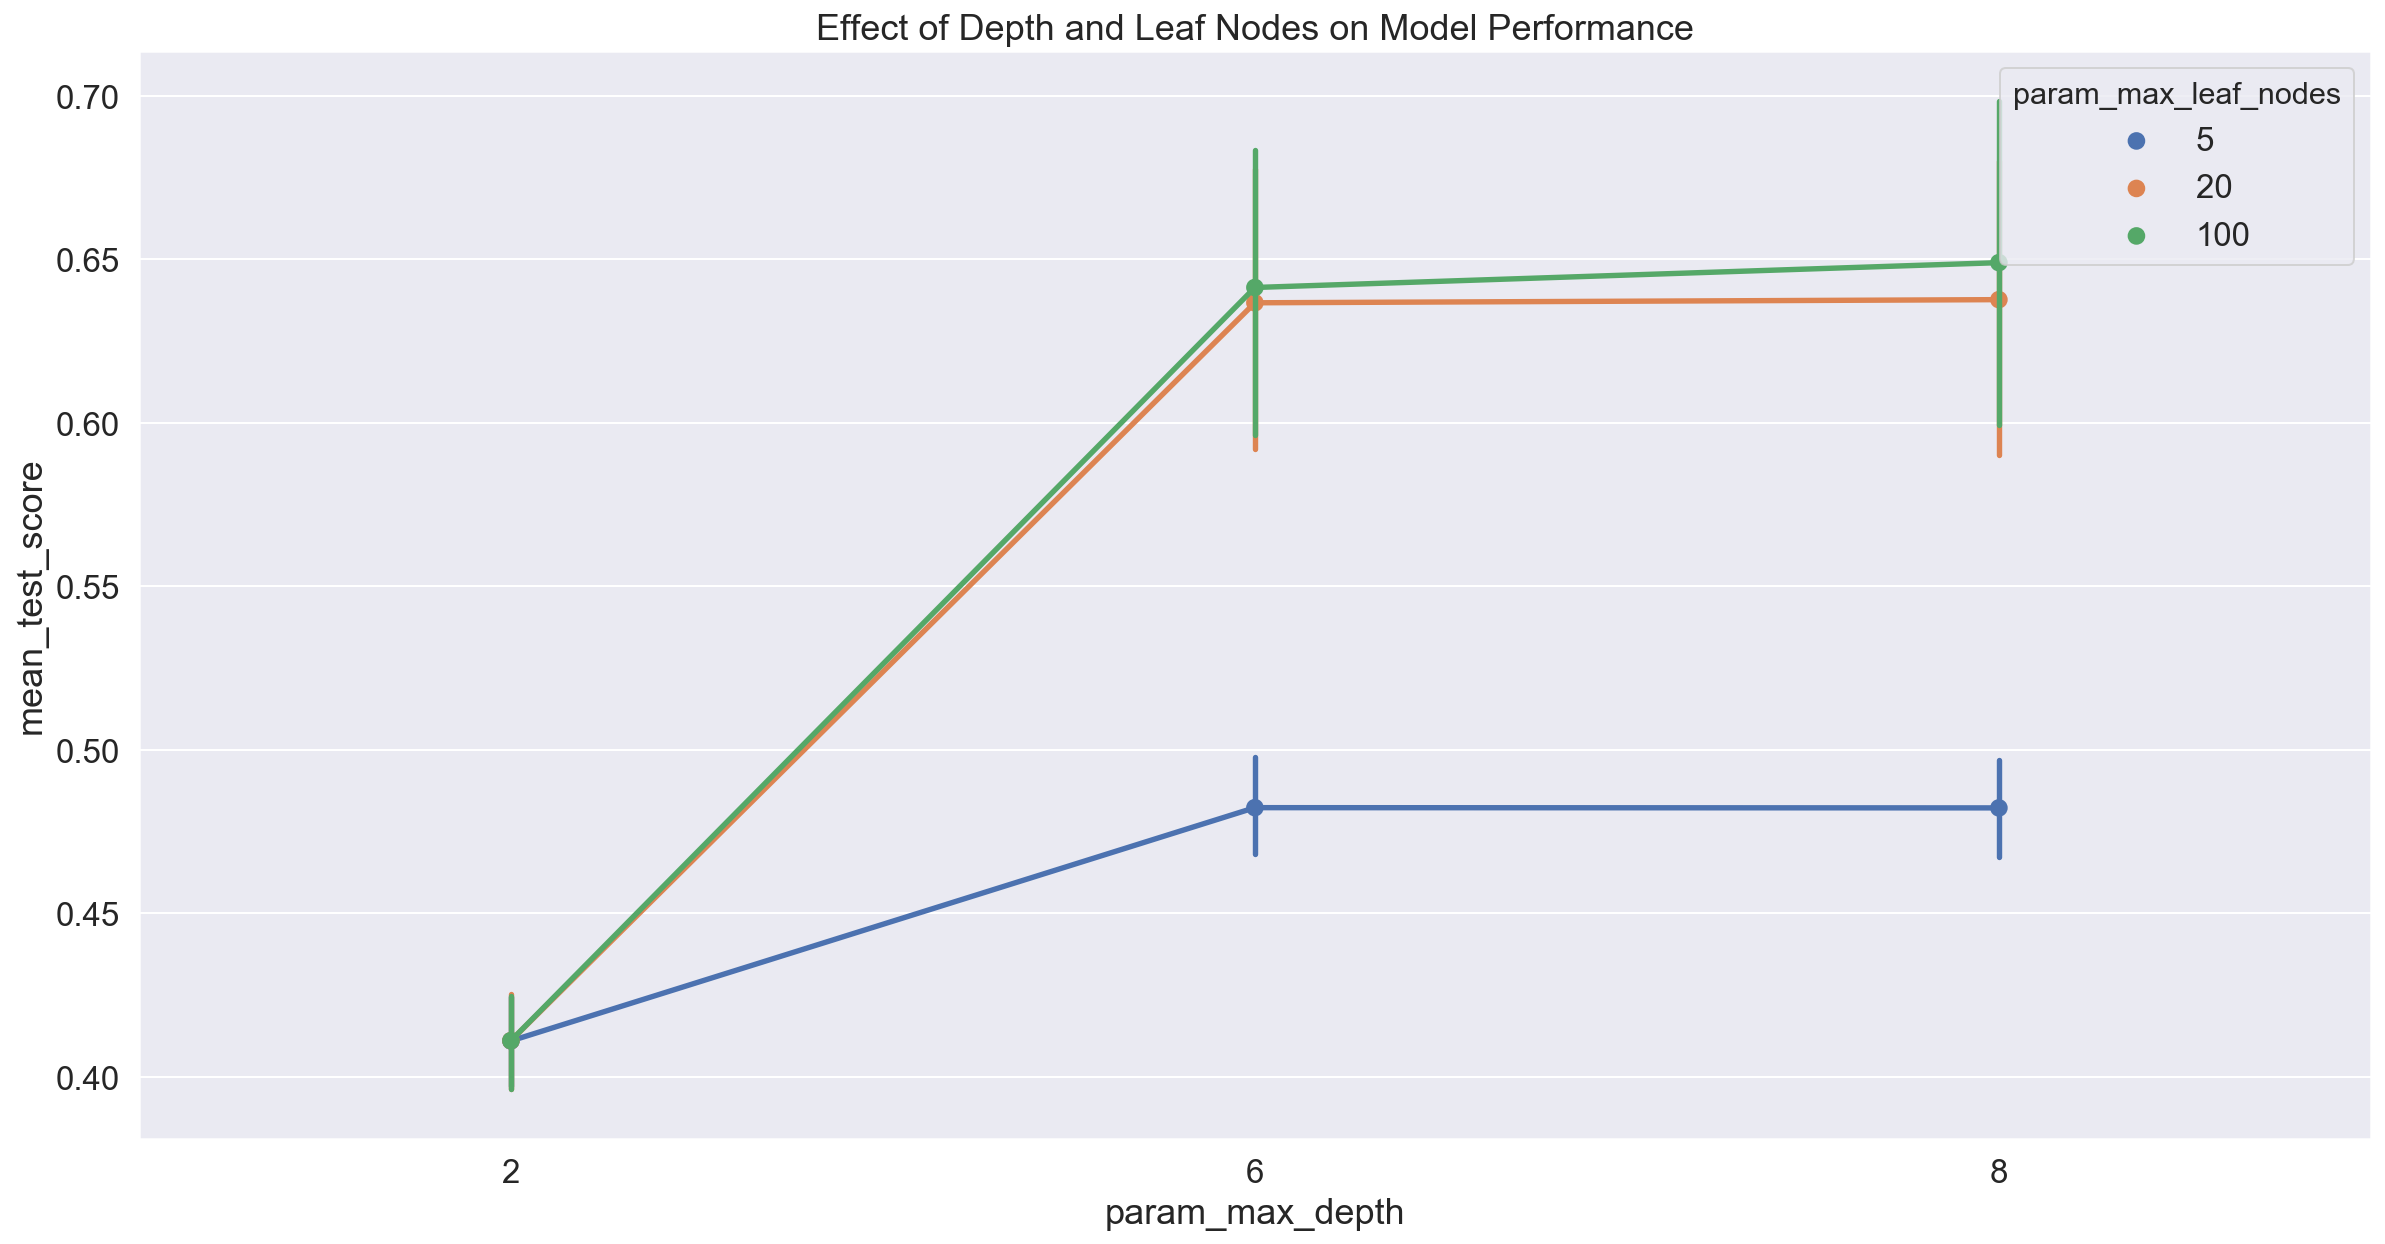

In [98]:
fig,ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance");

**The best max_depth will be 6, as after that it doesn't improve much**

In [99]:
r2_scores = cross_val_score(grid_cv_model2.best_estimator_, x2, y2, cv=10)
mse_scores = cross_val_score(grid_cv_model2.best_estimator_, x2, y2, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.776
MSE::-0.215


In [100]:
best_model = grid_cv_model2.best_estimator_

y2_pred = best_model.predict(x2_test)

r2_score = best_model.score(x2_test,y2_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % metrics.mean_squared_error(y2_test, y2_pred))

R-squared:0.836
MSE: 0.18


**We have achieved a R-Squared score of 83% and a mean square error of 0.18**

# Part 4: Applying Ensemble Techniques

## Original Score

In [101]:
model2.fit(x2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [102]:
y2_pred = model2.predict(x2_test)

In [103]:
print("r^2 Score of Model is: ", metrics.r2_score(y2_test, y2_pred))
print("Variance Score of Model is: ", metrics.explained_variance_score(y2_test, y2_pred))
print("The max error of Model is: ", metrics.max_error(y2_test, y2_pred))
print("The Mean Absolute Error is: ", metrics.mean_absolute_error(y2_test,y2_pred))
print("The Mean Square Error of model is: ", metrics.mean_squared_error(y2_test,y2_pred))
print("The Median Absolute Error of model is: ", metrics.median_absolute_error(y2_test, y2_pred));

r^2 Score of Model is:  0.8604774806293489
Variance Score of Model is:  0.860842587589677
The max error of Model is:  1.376542625319237
The Mean Absolute Error is:  0.27516775099865587
The Mean Square Error of model is:  0.15218180766629805
The Median Absolute Error of model is:  0.183858423307812


**We Can find the original scores above.**

## AdaBoost Regressor

In [104]:
model2_ada = AdaBoostRegressor(model2)
model2_ada.fit(x2_train,y2_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  rando

In [105]:
y2_pred = model2_ada.predict(x2_test)

In [106]:
print("r^2 Score of Model is: ", metrics.r2_score(y2_test, y2_pred))
print("Variance Score of Model is: ", metrics.explained_variance_score(y2_test, y2_pred))
print("The max error of Model is: ", metrics.max_error(y2_test, y2_pred))
print("The Mean Absolute Error is: ", metrics.mean_absolute_error(y2_test,y2_pred))
print("The Mean Square Error of model is: ", metrics.mean_squared_error(y2_test,y2_pred))
print("The Median Absolute Error of model is: ", metrics.median_absolute_error(y2_test, y2_pred));

r^2 Score of Model is:  0.8734454199395538
Variance Score of Model is:  0.8736623072951528
The max error of Model is:  1.8030502489860556
The Mean Absolute Error is:  0.25718566432936363
The Mean Square Error of model is:  0.13803724910445656
The Median Absolute Error of model is:  0.17846843695676817


**Overall, the r^2 score of model is higher and so is the variance score**

## Bagging

In [107]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(base_estimator=model2, n_estimators=100,random_state=100)
bgcl.fit(x2_train, y2_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_sample

In [108]:
y2_pred = bgcl.predict(x2_test)

In [109]:
print("r^2 Score of Model is: ", metrics.r2_score(y2_test, y2_pred))
print("Variance Score of Model is: ", metrics.explained_variance_score(y2_test, y2_pred))
print("The max error of Model is: ", metrics.max_error(y2_test, y2_pred))
print("The Mean Absolute Error is: ", metrics.mean_absolute_error(y2_test,y2_pred))
print("The Mean Square Error of model is: ", metrics.mean_squared_error(y2_test,y2_pred))
print("The Median Absolute Error of model is: ", metrics.median_absolute_error(y2_test, y2_pred));

r^2 Score of Model is:  0.8935979362629338
Variance Score of Model is:  0.8950269108333527
The max error of Model is:  1.8011757315106367
The Mean Absolute Error is:  0.23856544754956874
The Mean Square Error of model is:  0.11605623573865534
The Median Absolute Error of model is:  0.16427025278709528


**Overall, this is an even better score of coming close to 89% than adaboosting**

## Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 50,random_state=100)
rfcl = rfcl.fit(x2_train, y2_train)

In [111]:
y2_pred = rfcl.predict(x2_test)

In [112]:
print("r^2 Score of Model is: ", metrics.r2_score(y2_test, y2_pred))
print("Variance Score of Model is: ", metrics.explained_variance_score(y2_test, y2_pred))
print("The max error of Model is: ", metrics.max_error(y2_test, y2_pred))
print("The Mean Absolute Error is: ", metrics.mean_absolute_error(y2_test,y2_pred))
print("The Mean Square Error of model is: ", metrics.mean_squared_error(y2_test,y2_pred))
print("The Median Absolute Error of model is: ", metrics.median_absolute_error(y2_test, y2_pred));

r^2 Score of Model is:  0.8912649046594697
Variance Score of Model is:  0.892787931404665
The max error of Model is:  1.7734606213226967
The Mean Absolute Error is:  0.23865570779375614
The Mean Square Error of model is:  0.11860095015722581
The Median Absolute Error of model is:  0.16611937933915605


**All the scores are very close to the Bagging scores**

## Gradient Boost 

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50,random_state=100)
gbcl = gbcl.fit(x2_train, y2_train)

In [114]:
y2_pred = gbcl.predict(x2_test)

In [115]:
print("r^2 Score of Model is: ", metrics.r2_score(y2_test, y2_pred))
print("Variance Score of Model is: ", metrics.explained_variance_score(y2_test, y2_pred))
print("The max error of Model is: ", metrics.max_error(y2_test, y2_pred))
print("The Mean Absolute Error is: ", metrics.mean_absolute_error(y2_test,y2_pred))
print("The Mean Square Error of model is: ", metrics.mean_squared_error(y2_test,y2_pred))
print("The Median Absolute Error of model is: ", metrics.median_absolute_error(y2_test, y2_pred));

r^2 Score of Model is:  0.8543846288384456
Variance Score of Model is:  0.8544751869403924
The max error of Model is:  1.757501480898505
The Mean Absolute Error is:  0.30728596236632477
The Mean Square Error of model is:  0.1588274818095472
The Median Absolute Error of model is:  0.25632156403130857


**The overall scores for Gradient Boost seems to be less performing as compared to Bagging and Randomforest**

# Part 5: Conclusion 

**Overall, we see that the Bagging and RandomForest ensemble techniques are the best fit for us. Also, by using feature engineering and hyperparameter tuning, we have successfully refined the model further. This concludes the project.**